<span style="color: #ADD8E6; font-size: 1.2em;">

# Machine Learning Project
</span>

**Developed by Group 14:**

- **André Moreira** - *20222132*
- **Andreas Follestad** - *20240556*
- **Carolina Silvestre** - *20211512*
- **Manuel Andrade** - *20240571*

<a id="cont"></a>

# Contents

* [1. Data Exploration](#1)
    * [1.1 Train](#1.1)
        * [1.1.1 Descriptive Analysis](#1.1.1)
        * [1.1.2 Data Types](#1.1.2)
        * [1.1.3 Duplicates](#1.1.3)
        * [1.1.4 Missing Values and Zero Values](#1.1.4)
        * [1.1.5 Inconsistencies](#1.1.5)
    * [1.2 Test](#1.2)
        * [1.2.1 Descriptive Analysis](#1.2.1)
        * [1.2.2 Data Types](#1.2.2)
        * [1.2.3 Duplicates](#1.2.3)
        * [1.2.4 Missing Values and Zero Values](#1.2.4)
* [2. Data Preparation](#2)
    * [2.1 Remove Duplicates](#2.1)
    * [2.2 Set Index](#2.2)
    * [2.3 Data Splitting](#2.3)
    * [2.4 Add a Unique Identifier](#2.4)
* [3. Data Visualization](#3)
    * [3.1 Numerical Variables](#3.1)
        * [3.1.1 Histograms](#3.1.1)
        * [3.1.2 Box Plots](#3.1.2)
    * [3.2 Categorical Variables](#3.2)
    * [3.3 Correlation Matrix](#3.3)
    * [3.4 Non-Linear Correlation](#3.4)
* [4. Data Preprocessing](#4)
    * [4.1 Data Types](#4.1)
    * [4.2 Categorical Features](#4.2)
    * [4.3 Outliers](#4.3)
    * [4.4 Missing Values](#4.4)
    * [4.5 Drop Columns](#4.5)
    * [4.6 Feature Engeneering](#4.6)
        * [4.6.1 New Features](#4.6.1)
        * [4.6.2 Correlation](#4.6.2)
            * [4.6.2.1 Linear Correlation](#4.6.2.1)
            * [4.6.2.1 Non-Linear Correlation](#4.6.2.1)
        * [4.6.3 Standard Feature Transformations](#4.6.3)
            * [4.6.3.1 Logarithmic Transformation](#4.6.3.1)
            * [4.6.3.2 Polynomial Expansion](#4.6.3.2)
    * [4.7 Data Overview](#4.7)
    * [4.8 Encoding](#4.8)
        * [4.8.1 One-Hot Encoding](#4.8.1)
    * [4.9 Final Verification](#4.9)
* [5. Data Scalling](#5)
    * [5.1 Minmax Scaler](#5.1)
    * [5.2 Robust Scaler](#5.2)
    * [5.3 Standard Scaler](#5.3)
* [6. Feature Selection](#6)
    * [6.1 Lasso](#6.1)
    * [6.2 Chi-square](#6.2)
    * [6.3 RFE](#6.3)
* [7. Modelling](#7)
    * [7.1 KNN Classifier](#7.1)
    * [7.2 SVC](#7.2)
    * [7.3 Logistic Regression](#7.3)
    * [7.4 Decision Tree](#7.4)
    * [7.5 Random Forest](#7.5)
    * [7.6 Neural Networks](#7.6)
    * [7.7 XGBoost](#7.7)
* [8. Algorithms with Optimal Hyperparameters and Kaggle Output](#8)
    * [8.1 KNN](#8.1)
    * [8.2 SVC](#8.2)
    * [8.3 Logistic Regression](#8.3)
    * [8.4 Decision Tree](#8.4)
    * [8.5 Random Forest](#8.5)
    * [8.6 MLP](#8.6)
    * [8.7 XGB](#8.7)
* [9. Model Analysis: ROC Curves](#9)
    * [9.1. ROC Curves for KNN, Logistic, Decision Tree, Random Forest, and MLP](#9.1)
    * [9.2. ROC Curves SVC](#9.2)
    * [9.3. ROC Curves XGB](#9.3)

### Import all the needed packages:

In [1]:
# Operating system and file handling
import os
import csv

# Data manipulation and numerical computations
import numpy as np
import pandas as pd

# Data visualization
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency

# Machine learning utilities and models
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, label_binarize
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
)
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_class_weight

# Summary tools (requires installation)
from summarytools import dfSummary

# External libraries
import xgboost as xgb

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

### Import the dataset:

In [2]:
data_train = pd.read_csv('train_data.csv')

In [3]:
data_test = pd.read_csv('test_data.csv')

### Copy of the dataset:

In [4]:
df = data_train.copy()

In [5]:
test = data_test.copy()

### Code to display all columns when viewing output:

In [6]:
pd.set_option('display.max_columns', None)

<a id="1"></a>

# 1. Data Exploration
[Back to Contents](#cont)

<a id="1.1"></a>

## 1.1 Train

In [7]:
df.shape

(593471, 33)

In [8]:
# Checking first 10 rows
df.head(10)

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   
5    2019-12-26           67.0                              N    2020-01-01   
6    2019-12-28           48.0                              N    2020-01-01   
7    2019-12-30           33.0                              N    2020-01-01   
8    2019-12-23           55.0                              N    2020-01-01   
9    2019-12-29           20.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   
5                       N                 0.00      1952.0  2019-12-31   
6                       N                 0.00      1971.0  2019-12-31   
7                       N                 0.00      1986.0  2019-12-31   
8                       N                 0.00      1964.0  2020-01-01   
9                       N               225.00         NaN  2019-12-31   

     C-3 Date                  Carrier Name      Carrier Type  \
0         NaN    NEW HAMPSHIRE INSURANCE CO       1A. PRIVATE   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO       1A. PRIVATE   
2         NaN     INDEMNITY INSURANCE CO OF       1A. PRIVATE   
3         NaN                           NaN               NaN   
4         NaN          STATE INSURANCE FUND           2A. SIF   
5         NaN   INDEMNITY INS. OF N AMERICA       1A. PRIVATE   
6         NaN             LM INSURANCE CORP       1A. PRIVATE   
7  2020-03-04          STATE INSURANCE FUND           2A. SIF   
8         NaN      ROCHESTER, UNIVERSITY OF  4A. SELF PRIVATE   
9         NaN             LM INSURANCE CORP       1A. PRIVATE   

   Claim Identifier Claim Injury Type County of Injury COVID-19 Indicator  \
0           5393875       2. NON-COMP     ST. LAWRENCE                  N   
1           5393091      4. TEMPORARY          WYOMING                  N   
2           5393889      4. TEMPORARY           ORANGE                  N   
3         957648180               NaN              NaN                NaN   
4           5393887       2. NON-COMP         DUTCHESS                  N   
5           5393863       3. MED ONLY          SUFFOLK                  N   
6           5393848       2. NON-COMP         ONONDAGA                  N   
7           5394182       2. NON-COMP         RICHMOND                  N   
8           5393881       2. NON-COMP           MONROE                  N   
9           5394084       3. MED ONLY            KINGS                  N   

  District Name First Hearing Date Gender  IME-4 Count  Industry Code  \
0      SYRACUSE                NaN      M          NaN           44.0   
1     ROCHESTER         2020-02-21      F          4.0           23.0   
2        ALBANY                NaN      M          NaN           56.0   
3           NaN                NaN    NaN          NaN            NaN   
4        ALBANY                NaN      M          NaN           62.0   
5     HAUPPAUGE                NaN      M          NaN           44.0   
6      SYRACUSE                NaN      M          NaN           72.0   
7           NYC                NaN      F          NaN           62.0   
8     ROCHESTER                NaN      F          NaN           61.0   
9           NYC        

<a id="1.1.1"></a>

### 1.1.1 Descriptive Analysis

In [9]:
# Column information - we can see see that 21 columns are of the type "object"
df.info()

object_columns_count = df.select_dtypes(include=['object']).shape[1]
print(object_columns_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [10]:
# Describe gives us a summary of the numerical columns in the dataset
df.describe().T.round(2)

count         mean           std  \
Age at Injury                       574026.0        42.11  1.426000e+01   
Average Weekly Wage                 545375.0       491.09  6.092920e+03   
Birth Year                          544948.0      1886.77  4.146400e+02   
Claim Identifier                    593471.0  23667598.79  1.079271e+08   
IME-4 Count                         132803.0         3.21  2.830000e+00   
Industry Code                       564068.0        58.65  1.964000e+01   
OIICS Nature of Injury Description       0.0          NaN           NaN   
WCIO Cause of Injury Code           558386.0        54.38  2.587000e+01   
WCIO Nature of Injury Code          558369.0        41.01  2.221000e+01   
WCIO Part Of Body Code              556944.0        39.74  2.237000e+01   
Agreement Reached                   574026.0         0.05  2.100000e-01   
Number of Dependents                574026.0         3.01  2.000000e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

The df.describe provide us with a concise summary of the data frame. Some of the key statistics we want to take away from this is;<br>
- Age of Injury the 25th percentile (Q1) being 31 or younger, the meadian (Q2) being 42 or younger, the 75th percentile (Q3) being 54 or younger, and the maximum being 117 years old. The latter is an anomalie and we will deal with that later.

- Average Weekly Wage: we have a mean of 491, the minimum is 0 (which means someone is not getting paid), as well as the Q1 and Q2. the 75th percentile of 841, and the maximum is 2828079. We have a very clear anomaly for the distribution - some getting paid a lot and some not at all which we will explore more later.

- Birth Year: shows that the lower 25 percentile are born in 1965, the median of birth year is 1977, the 75th percentile in 1989. An anomaly here is the maximum which shows that the youngest person is born in 2018 (another anomaly)

- Industry Code: we disregard the mean because its a calculation and its not the correct mean for which industry the most people work in. However, the lowest amount of workers have industry code 11, the 25th percentile are in code 45, 50th percentile in 61, the 75th percentile in 71, and the maximum in the 90th.

- WCIO Cause of Injury Code / Part Of Body Code / Nature Of Injury Code: the same apply here as for Industry Code (if it doesn't represent the amount of people on the industry)

<a id="1.1.2"></a>

### 1.1.2 Data Types

In [11]:
df.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

<a id="1.1.4"></a>

### 1.1.3 Duplicates

In [12]:
# Check if there are any duplicated rows
df.duplicated().sum()

0

In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
593466    False
593467    False
593468    False
593469    False
593470    False
Length: 593471, dtype: bool

In [14]:
df[df.duplicated()]

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

In [15]:
# Check if there are any claim identifier duplicated
duplicates_dict = df['Claim Identifier'].value_counts()[df['Claim Identifier'].value_counts() > 1].to_dict()
print(duplicates_dict)

{292668076: 2}


In [16]:
df[df['Claim Identifier'] == 292668076]

Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name Carrier Type  Claim Identifier  \
257901      NaN      NaN          NaN          NaN         292668076   
526445      NaN      NaN          NaN          NaN         292668076   

       Claim Injury Type County of Injury COVID-19 Indicator District Name  \
257901               NaN              NaN                NaN           NaN   
526445               NaN              NaN                NaN           NaN   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
257901                NaN    NaN          NaN            NaN   
526445                NaN    NaN          NaN            NaN   

       Industry Code Description Medical Fee Region  \
257901                       NaN                NaN   
526445                       NaN                NaN   

        OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
257901                                 NaN                        NaN   
526445                                 NaN                        NaN   

       WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
257901                              NaN                         NaN   
526445                              NaN                         NaN   

       WCIO Nature of Injury Description  WCIO Part Of Body Code  \
257901                               NaN                     NaN   
526445                               NaN                     NaN   

       WCIO Part Of Body Description Zip Code  Agreement Reached WCB Decision  \
257901                           NaN      NaN                NaN          NaN   
526445                           NaN      NaN                NaN          NaN   

        Number of Dependents  
257901                   NaN  
526445                   NaN

On the 3 steps above we checked that we don't have duplicated rows but we have the same claim twice and since the rows are unpopulated except for 2 variables we will need to remove them from the df to allow us to select "Claim Identifier" as the index.

<a id="1.1.4"></a>

### 1.1.4 Missing Values and Zero Values

In [17]:
# Making a list of missing value types to include non-standard missing values - making it a more robust check
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("train_data.csv", na_values = missing_values)

In [18]:
# Creating a table for missing values that shows the number of Total missing values and the Percentage of missing values
missing_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_values.columns = ['Total miss', 'Percentage miss']
missing_values.sort_values(by=['Total miss', 'Percentage miss'], ascending=False, inplace=True)
missing_values['Percentage miss'] = missing_values['Percentage miss'].apply(lambda x: f'{x:.2f}%')
missing_values

Total miss Percentage miss
OIICS Nature of Injury Description      593471         100.00%
IME-4 Count                             460668          77.62%
First Hearing Date                      442673          74.59%
C-3 Date                                406226          68.45%
Birth Year                               48523           8.18%
Average Weekly Wage                      48096           8.10%
Zip Code                                 48082           8.10%
WCIO Part Of Body Code                   36527           6.15%
WCIO Part Of Body Description            36527           6.15%
WCIO Nature of Injury Code               35102           5.91%
WCIO Nature of Injury Description        35102           5.91%
WCIO Cause of Injury Code                35085           5.91%
WCIO Cause of Injury Description         35085           5.91%
C-2 Date                                 34005           5.73%
Industry Code                            29403           4.95%
Industry Code Description                29403           4.95%
Accident Date                            23134           3.90%
Age at Injury                            19445           3.28%
Alternative Dispute Resolution           19445           3.28%
Attorney/Representative                  19445           3.28%
Carrier Name                             19445           3.28%
Carrier Type                             19445           3.28%
Claim Injury Type                        19445           3.28%
County of Injury                         19445           3.28%
COVID-19 Indicator                       19445           3.28%
District Name                            19445           3.28%
Gender                                   19445           3.28%
Medical Fee Region                       19445           3.28%
Agreement Reached                        19445           3.28%
WCB Decision                             19445           3.28%
Number of Dependents                     19445           3.28%
Assembly Date                                0           0.00%
Claim Identifier                             0           0.00%

From the missing values we can either choose to remove (if they don't significantly reduce the accuracy of our prediction model) or fill them with mean, median or mode depending on the variable.

The following are columns we choose to drop:

- **County of Injury** because we will use district name, which is more generalized and we don’t think the location you were injured will influence the target variable.
- **Industry Code Description** because we already use Industry Code that uniquely identifies the industry. Only using one of them reduces the workload for the models.
- **OIICS Nature Of Injury Description** because all data is missing.
- **WCIO Cause Of Injury Description** because we already have 'WCIO Cause of Injury Code'. The same justification as for 'Industry Code Description'.
- **WCIO Nature Of Injury Description** we already have 'WCIO Nature of Injury Code'.
- **WCIO Part Of Body Description** we already have 'WCIO Part Of Body Code'.
- **Carrier Name** we will drop this and rather use Carrier Type.
- **Zip Code** same as with 'County of Injury', we will use 'District Name'.
- **WCB Decision** because all the variables are the same.

Furthermore, we will choose to keep the column, but straight removal on missing values for:

- **C2- Date**

In [19]:
df_mv = df[df['WCB Decision'].isnull()]

missing_values_df = pd.concat([df_mv.isnull().sum(), 100 * df_mv.isnull().mean()], axis=1)
missing_values_df.columns = ['Total', 'Percentage']
missing_values_df.sort_values(by=['Total', 'Percentage'], inplace=True)
missing_values_df['Percentage'] = missing_values_df['Percentage'].apply(lambda x: f'{x:.2f}%')
print(missing_values_df.head())

df_mv.head(2)

                                Total Percentage
Assembly Date                       0      0.00%
Claim Identifier                    0      0.00%
Accident Date                   19445    100.00%
Age at Injury                   19445    100.00%
Alternative Dispute Resolution  19445    100.00%


Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
3            NaN            NaN                            NaN    2020-01-01   
33           NaN            NaN                            NaN    2020-01-01   

   Attorney/Representative  Average Weekly Wage  Birth Year C-2 Date C-3 Date  \
3                      NaN                  NaN         NaN      NaN      NaN   
33                     NaN                  NaN         NaN      NaN      NaN   

   Carrier Name Carrier Type  Claim Identifier Claim Injury Type  \
3           NaN          NaN         957648180               NaN   
33          NaN          NaN         363651794               NaN   

   County of Injury COVID-19 Indicator District Name First Hearing Date  \
3               NaN                NaN           NaN                NaN   
33              NaN                NaN           NaN                NaN   

   Gender  IME-4 Count  Industry Code Industry Code Description  \
3     NaN          NaN            NaN                       NaN   
33    NaN          NaN            NaN                       NaN   

   Medical Fee Region  OIICS Nature of Injury Description  \
3                 NaN                                 NaN   
33                NaN                                 NaN   

    WCIO Cause of Injury Code WCIO Cause of Injury Description  \
3                         NaN                              NaN   
33                        NaN                              NaN   

    WCIO Nature of Injury Code WCIO Nature of Injury Description  \
3                          NaN                               NaN   
33                         NaN                               NaN   

    WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
3                      NaN                           NaN      NaN   
33                     NaN                           NaN      NaN   

    Agreement Reached WCB Decision  Number of Dependents  
3                 NaN          NaN                   NaN  
33                NaN          NaN                   NaN

There are 19443 rows that only have Claim Identifier and Assembly Date we should remove these records.

In [20]:
# We check for zero values in the same way as we did for missing values
zero_values = pd.concat([(df == 0).sum(), 100 * (df == 0).mean()], axis=1)
zero_values.columns = ['Total zero', 'Percentage zero']
zero_values.sort_values(by=['Total zero', 'Percentage zero'], ascending=False, inplace=True)
zero_values['Percentage zero'] = zero_values['Percentage zero'].apply(lambda x: f'{x:.2f}%')
zero_values.head(6)

Total zero Percentage zero
Agreement Reached         547239          92.21%
Average Weekly Wage       335450          56.52%
Number of Dependents       81665          13.76%
Birth Year                 25081           4.23%
Age at Injury               5464           0.92%
Accident Date                  0           0.00%

#### Zero values analysis
- `Age at Injury` - previously checked 
- `Birth Year` - without it we can't get the majority of `Age at Injury` values - **to further analyse** 
- `Number of Dependents` - means that there are cases where the severity of the injury is null (?) - **ok**
- `Average Weekly Wage` - means that there are cases where there wasn't any wage - **ok**
- `Agreement Reached` - only 7.79% of the people reached an agreement - **ok**

In [21]:
z_and_mv = pd.concat([zero_values, missing_values], axis=1)

total_z_and_mv = pd.concat([(df == 0).sum() + df.isnull().sum(),100 * ((df == 0).mean() + df.isnull().mean())], axis=1)
total_z_and_mv.columns = ['Total', 'Percentage']
total_z_and_mv.sort_values(by=['Total', 'Percentage'], ascending=False, inplace=True)
total_z_and_mv['Percentage'] = total_z_and_mv['Percentage'].apply(lambda x: f'{x:.2f}%')

final_z_and_mv = pd.concat([total_z_and_mv, z_and_mv], axis=1)

final_z_and_mv

Total Percentage  Total zero  \
OIICS Nature of Injury Description  593471    100.00%           0   
Agreement Reached                   566684     95.49%      547239   
IME-4 Count                         460668     77.62%           0   
First Hearing Date                  442673     74.59%           0   
C-3 Date                            406226     68.45%           0   
Average Weekly Wage                 383546     64.63%      335450   
Number of Dependents                101110     17.04%       81665   
Birth Year                           73604     12.40%       25081   
Zip Code                             48082      8.10%           0   
WCIO Part Of Body Code               36527      6.15%           0   
WCIO Part Of Body Description        36527      6.15%           0   
WCIO Nature of Injury Code           35102      5.91%           0   
WCIO Nature of Injury Description    35102      5.91%           0   
WCIO Cause of Injury Code            35085      5.91%           0   
WCIO Cause of Injury Description     35085      5.91%           0   
C-2 Date                             34005      5.73%           0   
Industry Code                        29403      4.95%           0   
Industry Code Description            29403      4.95%           0   
Age at Injury                        24909      4.20%        5464   
Accident Date                        23134      3.90%           0   
Alternative Dispute Resolution       19445      3.28%           0   
Attorney/Representative              19445      3.28%           0   
Carrier Name                         19445      3.28%           0   
Carrier Type                         19445      3.28%           0   
Claim Injury Type                    19445      3.28%           0   
County of Injury                     19445      3.28%           0   
COVID-19 Indicator                   19445      3.28%           0   
District Name                        19445      3.28%           0   
Gender                               19445      3.28%           0   
Medical Fee Region                   19445      3.28%           0   
WCB Decision                         19445      3.28%           0   
Assembly Date                            0      0.00%           0   
Claim Identifier                         0      0.00%           0   

                                   Percentage zero  Total miss Percentage miss  
OIICS Nature of Injury Description           0.00%      593471         100.00%  
Agreement Reached                           92.21%       19445           3.28%  
IME-4 Count                                  0.00%      460668          77.62%  
First Hearing Date                           0.00%      442673          74.59%  
C-3 Date                                     0.00%      406226          68.45%  
Average Weekly Wage                         56.52%       48096           8.10%  
Number of Dependents                        13.76%       19445           3.28%  
Birth Year                                   4.23%       48523           8.18%  
Zip Code                                     0.00%       48082           8.10%  
WCIO Part Of Body Code                       0.00%       36527           6.15%  
WCIO Part Of Body Description                0.00%       36527           6.15%  
WCIO Nature of Injury Code                   0.00%       35102           5.91%  
WCIO Nature of Injury Description            0.00%       35102           5.91%  
WCIO Cause of Injury Code                    0.00%       35085           5.91%  
WCIO Cause of Injury Description             0.00%       35085           5.91%  
C-2 Date                                     0.00%       34005           5.73%  
Industry Code                                0.00%       29403           4.95%  
Industry Code Description                    0.00%       29403           4.95%  
Age at Injury                                0.92%       19445           3.28%  
Accident Date                                0.00%       23134        

<a id="1.1.5"></a>

### 1.1.5 Inconsistencies

In [22]:
df_u18 = df[(df['Age at Injury'] < 18) & (df['Age at Injury'] > 0)]
df_age0 = df[df['Age at Injury'] == 0]
df_over66 = df[df['Age at Injury'] > 66]
df_over75 = df[df['Age at Injury'] > 75]

print("Age at Injury between 0 and 18 years old:", df_u18.shape)
print(f"{(df_u18.shape[0] / df.shape[0])*100:.2f}%")

print("\nAge at Injury 0:", df_age0.shape)
print(f"{(df_age0.shape[0] / df.shape[0])*100:.2f}%")
print(df_age0[['Age at Injury','Birth Year', 'Accident Date']].head(10))

print("\nAge at Injury greater than retirement age:", df_over66.shape)
print(f"{(df_over66.shape[0] / df.shape[0])*100:.2f}%")

print("\nAge at Injury greater than 75 years old:", df_over75.shape)
print(f"{(df_over75.shape[0] / df.shape[0])*100:.2f}%")

Age at Injury between 0 and 18 years old: (2121, 33)
0.36%

Age at Injury 0: (5464, 33)
0.92%
      Age at Injury  Birth Year Accident Date
262             0.0         0.0    2019-06-26
358             0.0         0.0    2019-12-28
370             0.0      1959.0           NaN
396             0.0      1984.0           NaN
433             0.0         0.0    2019-12-20
486             0.0         0.0           NaN
599             0.0      1967.0           NaN
760             0.0      1971.0           NaN
1088            0.0      1959.0           NaN
1372            0.0         0.0    2019-12-20

Age at Injury greater than retirement age: (15955, 33)
2.69%

Age at Injury greater than 75 years old: (2407, 33)
0.41%


#### Regarding `Age at Injury` we can check that:
- there are under aged people working, which is possible and deserves highlight
- records that have 0 on the variable that is explained by a blank or a NAN either on `Birth Year` or `Accident Date`
- a considerable amount of records when someone has an injury after retirement age
- records where someone has an injury after 75 years old 

US retirement age per https://tradingeconomics.com/country-list/retirement-age-men

<a id="1.2"></a>

### 1.2 Test

In [23]:
test.shape

(387975, 30)

We have in total 387975 entries and 30 columns in our test dataset which makes the number of entries in the test set smaller than the training.

In [24]:
test.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24             19                              N    2023-01-02   
1    2022-11-20             19                              N    2023-01-02   
2    2022-12-26             59                              N    2023-01-02   
3    2022-12-28             55                              N    2023-01-02   
4    2022-12-20             25                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                  NaN      2003.0  2023-01-02   
1                       N                  NaN      2003.0  2023-01-02   
2                       N                  0.0      1963.0  2022-12-31   
3                       N                  0.0         0.0  2023-01-02   
4                       N                  0.0      1997.0  2022-12-31   

  C-3 Date                 Carrier Name Carrier Type  Claim Identifier  \
0      NaN    INDEMNITY INSURANCE CO OF  1A. PRIVATE           6165911   
1      NaN      A I U INSURANCE COMPANY  1A. PRIVATE           6166141   
2      NaN    AMGUARD INSURANCE COMPANY  1A. PRIVATE           6165907   
3      NaN  INDEMNITY INS. OF N AMERICA  1A. PRIVATE           6166047   
4      NaN   NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           6166102   

  County of Injury COVID-19 Indicator District Name First Hearing Date Gender  \
0            BRONX                  N           NYC                NaN      M   
1           QUEENS                  N           NYC                NaN      F   
2      WESTCHESTER                  N           NYC                NaN      F   
3           QUEENS                  N           NYC                NaN      F   
4            KINGS                  N           NYC                NaN      M   

   IME-4 Count  Industry Code  \
0          NaN           48.0   
1          NaN           45.0   
2          NaN           56.0   
3          NaN           48.0   
4          NaN           55.0   

                           Industry Code Description Medical Fee Region  \
0                     TRANSPORTATION AND WAREHOUSING                 IV   
1                                       RETAIL TRADE                 IV   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                III   
3                     TRANSPORTATION AND WAREHOUSING                 IV   
4            MANAGEMENT OF COMPANIES AND ENTERPRISES                 IV   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       31.0   
1                                 NaN                       75.0   
2                                 NaN                       68.0   
3                                 NaN                       25.0   
4                                 NaN                       79.0   

   WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0           FALL, SLIP OR TRIP, NOC                        10.0   
1          FALLING OR FLYING OBJECT                        10.0   
2                 STATIONARY OBJECT                        49.0   
3  FROM DIFFERENT LEVEL (ELEVATION)                        10.0   
4    OBJECT BEING LIFTED OR HANDLED                        40.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    54.0   
1                         CONTUSION                    10.0   
2                    SPRAIN OR TEAR                    62.0   
3                         CONTUSION                    53.0   
4                        LACERATION                    37.0   

  WCIO Part Of Body Description Zip Code  Number of Dependents  
0                     LOWER LEG    10466                     1  
1          MULTIPLE HEAD INJURY    11691                     1  
2                      BUTTOCKS    10604                     0  
3                          KNEE    11411         

<a id="1.2.1"></a>

### 1.2.1 Descriptive Analysis

In [25]:
# Test.describe with include = 'all' gives us a summary of all the columns in the test.csv dataset
test.describe(include = 'all').T.round(2)

count unique  \
Accident Date                         385531   3438   
Age at Injury                       387975.0    NaN   
Alternative Dispute Resolution        387975      3   
Assembly Date                         387975    434   
Attorney/Representative               387975      2   
Average Weekly Wage                 368771.0    NaN   
Birth Year                          368505.0    NaN   
C-2 Date                              378841   1048   
C-3 Date                               85216    626   
Carrier Name                          387975   1598   
Carrier Type                          387975      7   
Claim Identifier                    387975.0    NaN   
County of Injury                      387975     63   
COVID-19 Indicator                    387975      2   
District Name                         387975      8   
First Hearing Date                     43028    338   
Gender                                387975      4   
IME-4 Count                          35249.0    NaN   
Industry Code                       380239.0    NaN   
Industry Code Description             380239     20   
Medical Fee Region                    387975      5   
OIICS Nature of Injury Description       0.0    NaN   
WCIO Cause of Injury Code           377627.0    NaN   
WCIO Cause of Injury Description      377627     74   
WCIO Nature of Injury Code          377415.0    NaN   
WCIO Nature of Injury Description     377415     56   
WCIO Part Of Body Code              378426.0    NaN   
WCIO Part Of Body Description         378426     51   
Zip Code                              368633   6276   
Number of Dependents                387975.0    NaN   

                                                                       top  \
Accident Date                                                   2024-01-16   
Age at Injury                                                          NaN   
Alternative Dispute Resolution                                           N   
Assembly Date                                                   2023-09-21   
Attorney/Representative                                                  N   
Average Weekly Wage                                                    NaN   
Birth Year                                                             NaN   
C-2 Date                                                        2023-10-11   
C-3 Date                                                        2023-10-04   
Carrier Name                                          STATE INSURANCE FUND   
Carrier Type                                                   1A. PRIVATE   
Claim Identifier                                                       NaN   
County of Injury                                                    QUEENS   
COVID-19 Indicator                                                       N   
District Name                                                          NYC   
First Hearing Date                                              2024-02-06   
Gender                                                                   M   
IME-4 Count                                                            NaN   
Industry Code                                                          NaN   
Industry Code Description                HEALTH CARE AND SOCIAL ASSISTANCE   
Medical Fee Region                                                      IV   
OIICS Nature of Injury Description                                     NaN   
WCIO Cause of Injury Code                                              NaN   
WCIO Cause of Injury Description    FELLOW WORKER, PATIENT OR OTHER PERSON   
WCIO Nature of Injury Code                                             NaN   
WCIO Nature of Injury Description                           STRAIN OR TEAR   
WCIO Part Of Body Code                                                 NaN   
WCIO Part Of Body Description                                     MULTIPLE   
Zip Code                                                             11

Here we have an extensive summary of the test dataset which are descriptive attributes associated with the claims assembled from January 2023 onward. Some of the key statistics we want to take away from this is:

- Count: shows us that there are some missing values that we need to take care of.

- age at injury are very similar to what it is in the training dataset

- something else worth mentioning is tht that 'Average Weekly Wage' is identical to what it is in the training dataset

<a id="1.2.2"></a>

### 1.2.2 Data types

In [26]:
test.dtypes

Accident Date                          object
Age at Injury                           int64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                     object
OIICS Nature of Injury Description

<a id="1.2.3"></a>

### 1.2.3 Duplicates

In [27]:
# Check if there are any duplicated rows
test.duplicated().sum()

0

In [28]:
test[test.duplicated()]

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Number of Dependents]
Index: []

<a id="1.2.4"></a>

### 1.2.4 Missing Values and Zero Values

In [29]:
# Creating a table for missing values that shows the number of Total missing values and the Percentage of missing values in the test dataset
missing_values = pd.concat([test.isnull().sum(), 100 * test.isnull().mean()], axis=1)
missing_values.columns = ['Total miss', 'Percentage miss']
missing_values.sort_values(by=['Total miss', 'Percentage miss'], ascending=False, inplace=True)
missing_values['Percentage miss'] = missing_values['Percentage miss'].apply(lambda x: f'{x:.2f}%')
missing_values

Total miss Percentage miss
OIICS Nature of Injury Description      387975         100.00%
IME-4 Count                             352726          90.91%
First Hearing Date                      344947          88.91%
C-3 Date                                302759          78.04%
Birth Year                               19470           5.02%
Zip Code                                 19342           4.99%
Average Weekly Wage                      19204           4.95%
WCIO Nature of Injury Code               10560           2.72%
WCIO Nature of Injury Description        10560           2.72%
WCIO Cause of Injury Code                10348           2.67%
WCIO Cause of Injury Description         10348           2.67%
WCIO Part Of Body Code                    9549           2.46%
WCIO Part Of Body Description             9549           2.46%
C-2 Date                                  9134           2.35%
Industry Code                             7736           1.99%
Industry Code Description                 7736           1.99%
Accident Date                             2444           0.63%
Age at Injury                                0           0.00%
Alternative Dispute Resolution               0           0.00%
Assembly Date                                0           0.00%
Attorney/Representative                      0           0.00%
Carrier Name                                 0           0.00%
Carrier Type                                 0           0.00%
Claim Identifier                             0           0.00%
County of Injury                             0           0.00%
COVID-19 Indicator                           0           0.00%
District Name                                0           0.00%
Gender                                       0           0.00%
Medical Fee Region                           0           0.00%
Number of Dependents                         0           0.00%

In [30]:
# We check for zero values in the same way as we did for missing values
zero_values = pd.concat([(test == 0).sum(), 100 * (df == 0).mean()], axis=1)
zero_values.columns = ['Total zero', 'Percentage zero']
zero_values.sort_values(by=['Total zero', 'Percentage zero'], ascending=False, inplace=True)
zero_values['Percentage zero'] = zero_values['Percentage zero'].apply(lambda x: f'{x:.2f}%')
zero_values.head(6)

Total zero Percentage zero
Average Weekly Wage               316549.0          56.52%
Number of Dependents               55316.0          13.76%
Birth Year                         19596.0           4.23%
Age at Injury                       3248.0           0.92%
Accident Date                          0.0           0.00%
Alternative Dispute Resolution         0.0           0.00%

Again, we use the same method for test dataset to check for missing values.<br>

For the test dataset we will treat the missing values as well as the zero values in the same way we did in the training dataset.

<a id="2"></a>

# 2. Data Preparation
[Back to Contents](#cont)

<a id="2.1"></a>

### 2.1 Remove Duplicates

In [31]:
df.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [32]:
# Remove Claim "292668076" since these two rows only have their relevant Claim Identifier number and the assemly data, rest values in features are missing values. 
df = df[df['Claim Identifier'] != 292668076]

<a id="2.2"></a>

### 2.2 Set Index

In [33]:
df.dropna(subset=["Claim Injury Type"],inplace=True)

In [34]:
df = df.set_index('Claim Identifier')
test = test.set_index('Claim Identifier')

<a id="2.3"></a>

### 2.3 Data Splitting

Define as data the independent variables and target the dependent variable.

In [35]:
data_train = df.drop('Claim Injury Type', axis=1) # features
target_train = df['Claim Injury Type'] # target variable

By using the method train_test_split from sklearn.model_selection, split the dataset into train(80%) and validation(20%).

In [36]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data_train, 
                                                    target_train, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True,
                                                    stratify=target_train
                                                   )

In [37]:
print(df.shape)
print(X_train.shape)

(574026, 32)
(459220, 31)


<a id="3"></a>

# 3. Data Visualization
[Back to Contents](#cont)

In [38]:
# Separating numeric and non-numeric columns
numeric_columns = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count']
non_numeric_columns = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents'] 

<a id="3.1"></a>

## 3.1 Numerical Variables

<a id="3.1.1"></a>

### 3.1.1 Histograms

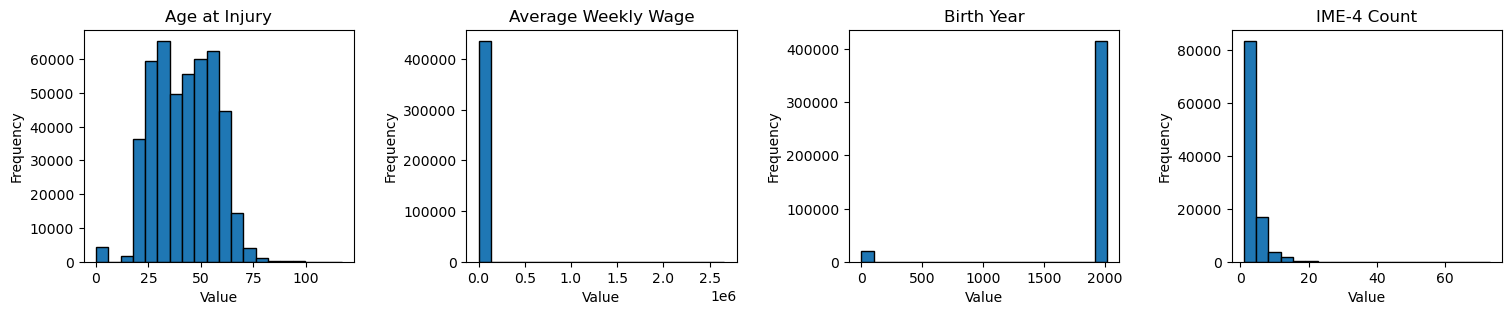

In [39]:
num_vars = len(numeric_columns)
# Create subplots
fig, axes = plt.subplots(1, num_vars, figsize=(4 * num_vars, 4))  # Adjust figsize dynamically
fig.tight_layout(pad=5.0)

# Plot histograms
for i, var in enumerate(numeric_columns):
    axes[i].hist(X_train[var], bins=20, edgecolor='black')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.show()

<a id="3.1.2"></a>

### 3.1.2 Box Plots

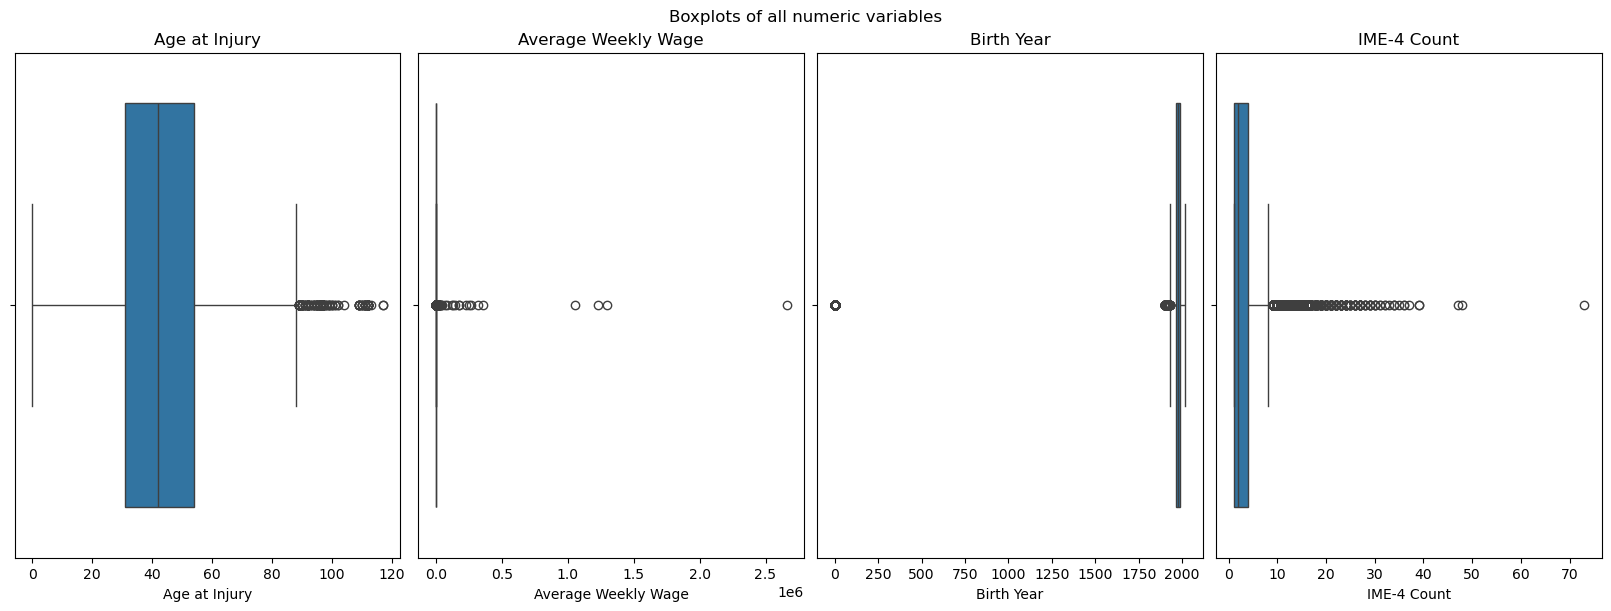

In [40]:
rows = 1
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 6), constrained_layout=True)
for ax, var in zip(axes.flatten(), numeric_columns):
    sns.boxplot(x=X_train[var], ax=ax, orient='h')
    ax.set_title(var)
fig.suptitle('Boxplots of all numeric variables', fontsize=12)
plt.show()

<a id="3.2"></a>

## 3.2 Categorical Variables

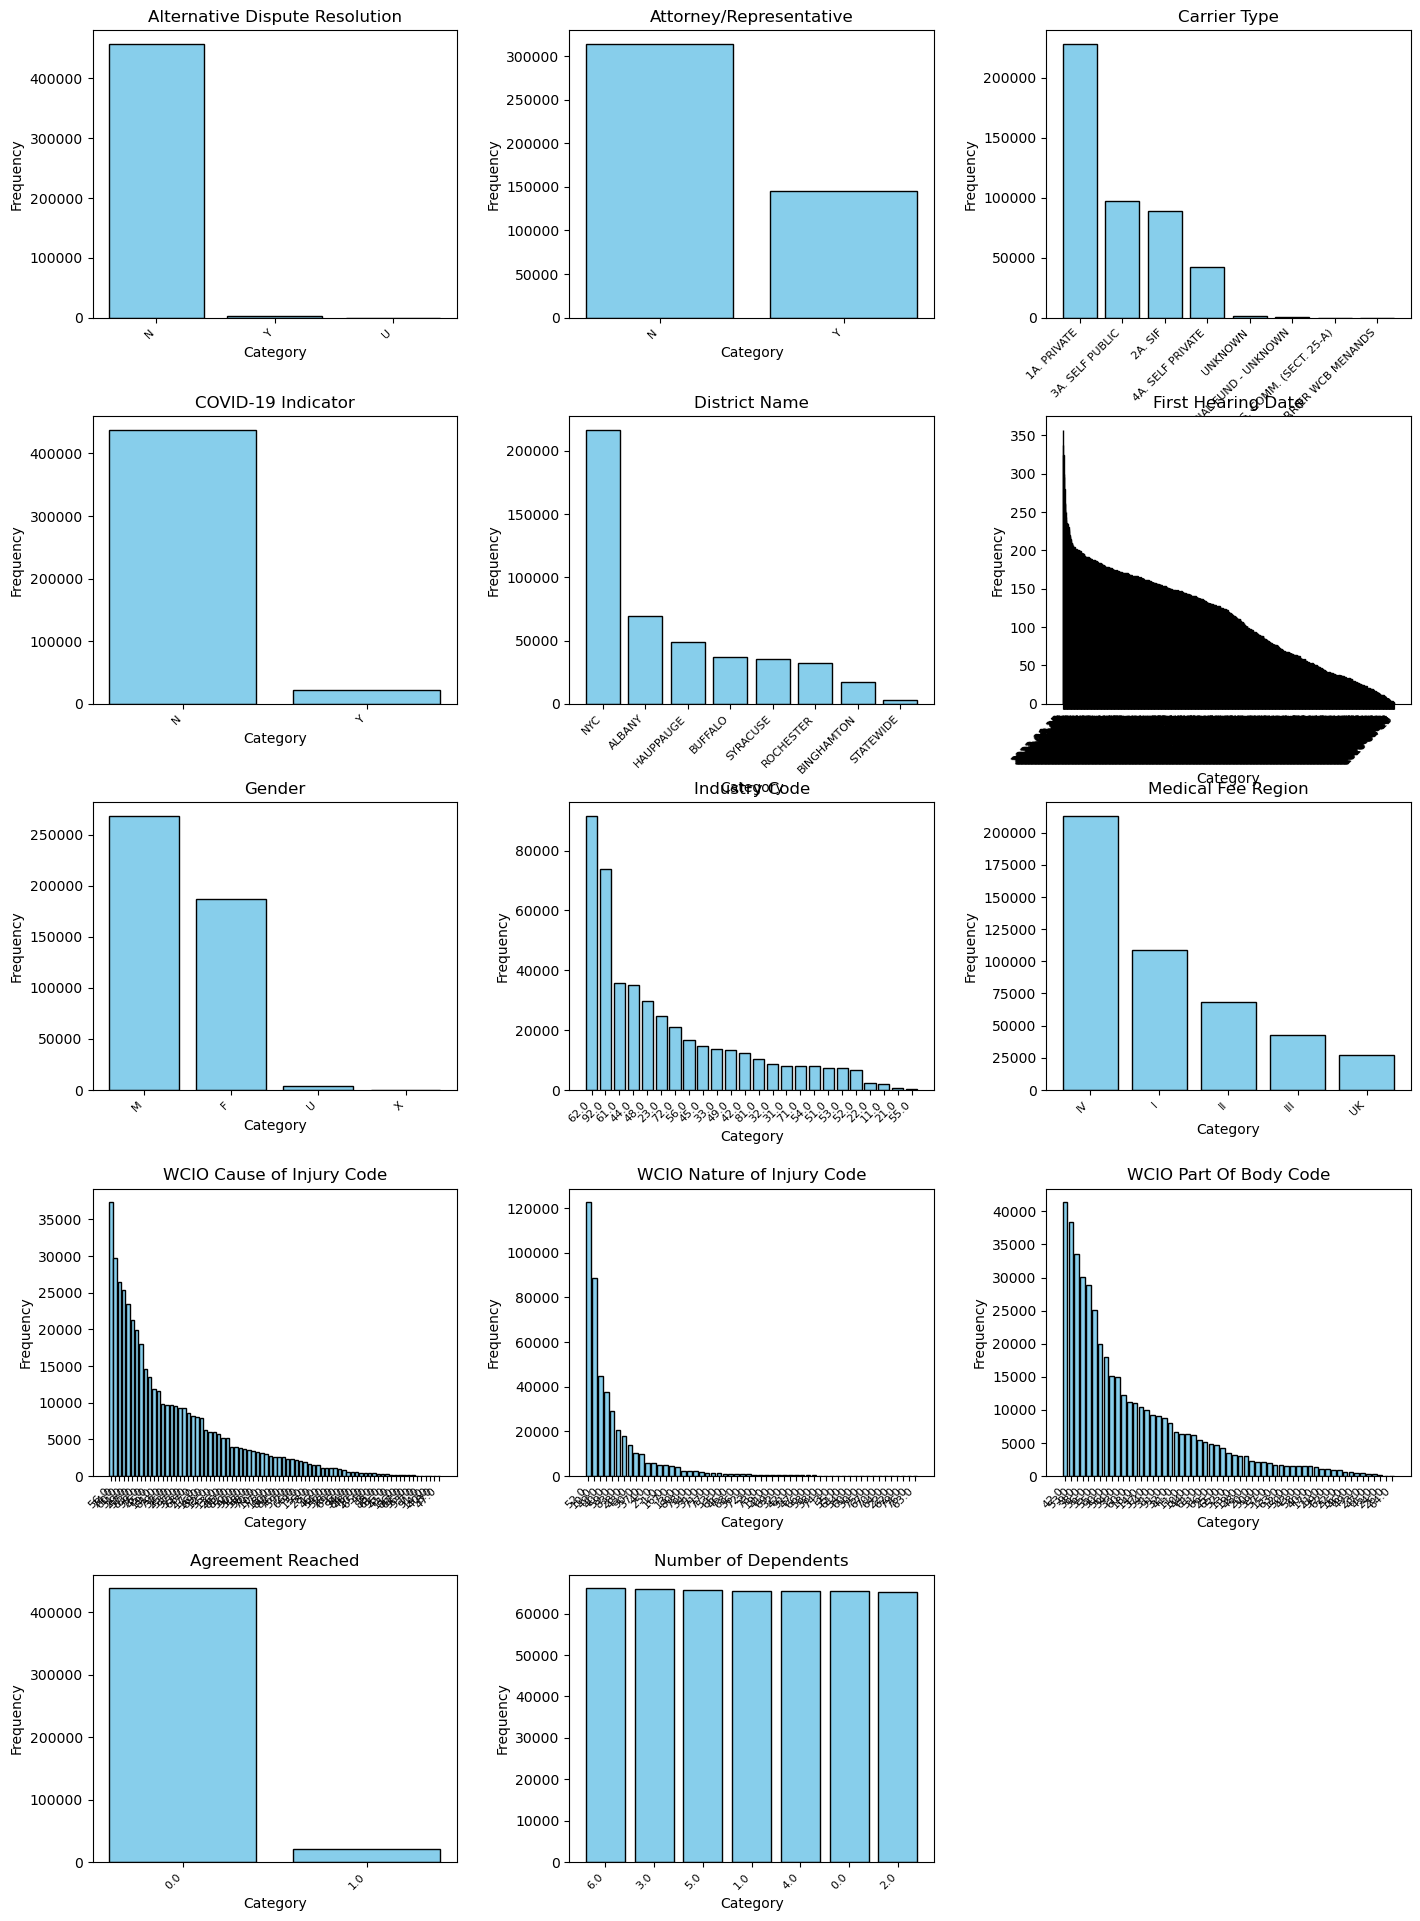

In [41]:
# Number of columns in the subplot grid
cols = 3
rows = math.ceil(len(non_numeric_columns) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten axes for easy indexing
fig.tight_layout(pad=5.0)

# Plot bar charts for each categorical variable
for i, var in enumerate(non_numeric_columns):
    value_counts = X_train[var].value_counts()  # Get value counts
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(var)
    axes[i].set_xticklabels(value_counts.index.astype(str), rotation=45, ha='right', fontsize=8)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Category')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

<a id="3.3"></a>

## 3.3 Correlation Matrix

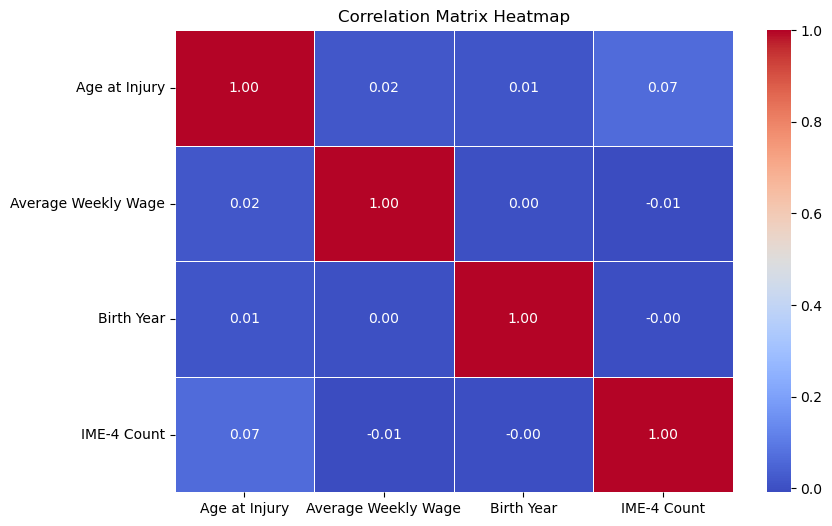

In [42]:
correlation_matrix = X_train[numeric_columns].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<a id="3.4"></a>

## 3.4 Non-Linear Correlation

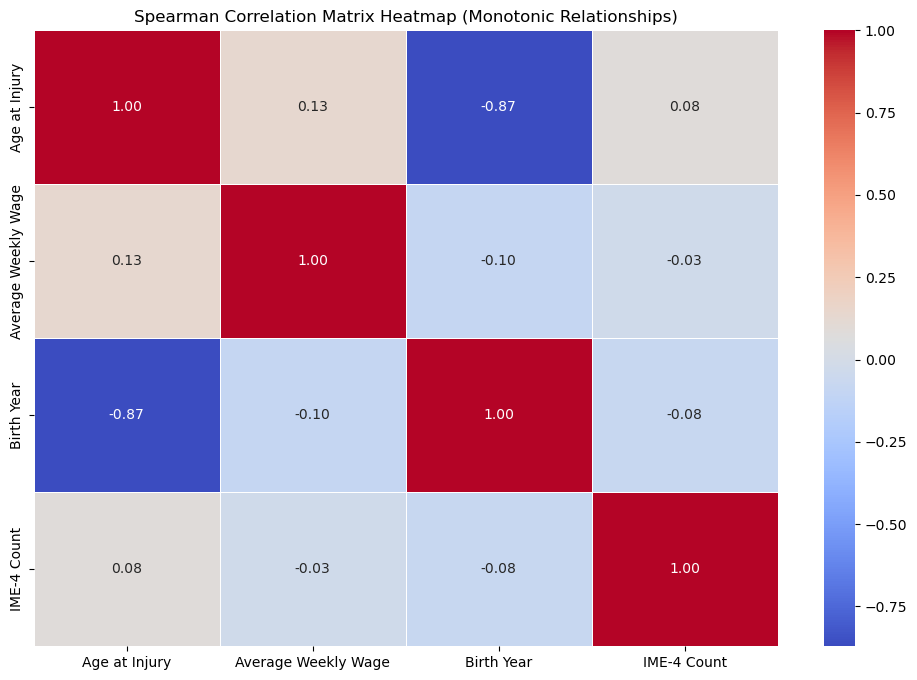

In [43]:
# Calculate the Spearman correlation matrix
correlation_matrix = X_train[numeric_columns].corr(method='spearman')

# Plot the heatmap for the Spearman correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix Heatmap (Monotonic Relationships)')
plt.show()

<a id="4"></a>

# 4. Data Preprocessing
[Back to Contents](#cont)

<a id="4.1"></a>

## 4.1 Data Types

#### Train

In [44]:
# Automatically convert all columns ending with 'Date' to datetime64[ns]
date_columns = [col for col in X_train.columns if col.endswith('Date')]

# Convert these columns to datetime
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')  # errors='coerce' handles invalid dates gracefully

# Verify that the conversion was successful
print(X_train.dtypes)

Accident Date                         datetime64[ns]
Age at Injury                                float64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                   float64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                  float64
Industry Code                                float64
Industry Code Description                     

#### Validation

In [45]:
# Automatically convert all columns ending with 'Date' to datetime64[ns]
date_columns = [col for col in X_val.columns if col.endswith('Date')]

# Convert these columns to datetime
for col in date_columns:
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce')  # errors='coerce' handles invalid dates gracefully

# Verify that the conversion was successful
print(X_val.dtypes)

Accident Date                         datetime64[ns]
Age at Injury                                float64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                   float64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                  float64
Industry Code                                float64
Industry Code Description                     

#### Test

In [46]:
# Converting date columns to datetime
test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], errors='coerce')
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')

<a id="4.2"></a>

## 4.2 Categorical Features

#### Train

In [47]:
# Treating categorical values in 'Attorney/Representative'
X_train = X_train.dropna(subset=['Attorney/Representative'])
X_train['Attorney/Representative'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1}).astype('int64')

# Verify the transformation
print(X_train['Attorney/Representative'])

Claim Identifier
5588808    1
5781745    0
6089649    1
5846683    0
5856829    1
          ..
6060162    0
5397366    0
5801860    1
5699824    1
5794934    1
Name: Attorney/Representative, Length: 459220, dtype: int64


In [48]:
# Treating categorical values 'Alternative Dispute Resolution' e 'COVID-19 Indicator'
X_train['Alternative Dispute Resolution'] = X_train['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 0})
X_train['COVID-19 Indicator'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1}).astype('int64')

In [49]:
# Consider 'U' and 'X' as missing values, so we only have Male and Female
X_train['Gender'] = X_train['Gender'].replace('U', np.nan)

# Fill missing values with the mode
gender_mode = X_train['Gender'].mode()[0]
X_train['Gender'].fillna(gender_mode, inplace=True)

#### Validation

In [50]:
# Treating categorical values in 'Attorney/Representative'
X_val = X_val.dropna(subset=['Attorney/Representative'])
X_val['Attorney/Representative'] = X_val['Attorney/Representative'].replace({'N': 0, 'Y': 1}).astype('int64')

# Verify the transformation
print(X_val['Attorney/Representative'])

Claim Identifier
5888758    1
5412745    1
5937929    0
5785719    0
5441248    0
          ..
5421115    0
5601874    0
6004662    0
5748069    0
6077644    0
Name: Attorney/Representative, Length: 114806, dtype: int64


In [51]:
# Treating categorical values 'Alternative Dispute Resolution' e 'COVID-19 Indicator'
X_val['Alternative Dispute Resolution'] = X_val['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 0})
X_val['COVID-19 Indicator'] = X_val['COVID-19 Indicator'].replace({'N': 0, 'Y': 1}).astype('int64')

<a id="4.3"></a>

## 4.3 Outliers

In [52]:
X_train = X_train[(X_train['Age at Injury'] > 14) & (X_train['Age at Injury'] < 88.5)]

In [53]:
X_train = X_train[(X_train['Birth Year'] >= 1933) & (X_train['Birth Year'] <= 2008)]

- `Age at Injury` - 14 < X < 88.5
- `Brith Year` - same logic used as in `Age at Injury`

<a id="4.4"></a>

## 4.4 Missing Values

#### Train

In [54]:
# We will drop this feature, since it has 76.21% of missing values

X_train.drop(['IME-4 Count'], axis=1, inplace=True)

In [55]:
# Calculate the mean for 'Accident Date' and 'Assembly Date'
mean_accident_date = X_train['Accident Date'].mean()
mean_assembly_date = X_train['Assembly Date'].mean()

# Fill missing values with the mean
X_train['Accident Date'].fillna(mean_accident_date, inplace=True)
X_train['Assembly Date'].fillna(mean_assembly_date, inplace=True)

In [56]:
average_weekly_wage_per_industry = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()
average_weekly_wage = X_train['Average Weekly Wage'].mean()

# Given that 58.109% of the dat has vaklues of 0 for Average Weekly Wage we will assume that these are all volunteer workers. 
missing_values_count = X_train["Average Weekly Wage"].isnull().sum()
num_impute_zero = round(missing_values_count * 0.58109)
num_impute_value = missing_values_count - num_impute_zero
# the median "Average Weekly Wage" is 1068.94
imputed_values = np.array([0] * num_impute_zero + [1068.94] * num_impute_value)
np.random.shuffle(imputed_values)
X_train.loc[X_train["Average Weekly Wage"].isnull(), "Average Weekly Wage"] = imputed_values

In [57]:
X_train.dropna(subset=["C-2 Date"], inplace=True)

In [58]:
X_train['Gender'] = X_train['Gender'].replace('U', np.nan)
gender_mode = X_train['Gender'].mode()[0]
X_train['Gender'].fillna(gender_mode, inplace=True)
X_train['Gender'] = X_train['Gender'].replace(['X'], 'U')
gender_mapping = {'M': 0, 'F': 1, 'U': 2}
X_train['Gender'] = X_train['Gender'].map(gender_mapping)

In [59]:
# Fill missing values with mode
industry_mode = X_train['Industry Code'].mode()[0]
X_train['Industry Code'].fillna(industry_mode, inplace=True)

# Change data type to integer
X_train["Industry Code"] = X_train["Industry Code"].astype("int")

In [60]:
X_train['Medical Fee Region'] = X_train['Medical Fee Region'].replace('UK', np.nan)
medical_region_by_district = X_train.groupby('District Name')['Medical Fee Region'].value_counts().unstack(fill_value=0)
def fill_with_district_mode(X_train, target_column, district_column):
    mode_per_district = X_train.groupby(district_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    X_train[target_column] = X_train.apply(
        lambda row: mode_per_district[row[district_column]] if pd.isnull(row[target_column]) and pd.notnull(row[district_column]) else row[target_column],
        axis=1
    )

fill_with_district_mode(X_train, 'Medical Fee Region', 'District Name')

In [61]:
cic_mode = X_train['WCIO Cause of Injury Code'].mode()[0]
X_train['WCIO Cause of Injury Code'].fillna(cic_mode, inplace=True)

In [62]:
nic_mode = X_train['WCIO Nature of Injury Code'].mode()[0]
X_train['WCIO Nature of Injury Code'].fillna(nic_mode, inplace=True)

In [63]:
pbc_mode = X_train['WCIO Part Of Body Code'].mode()[0]
X_train['WCIO Part Of Body Code'].fillna(pbc_mode, inplace=True)

- `Accident Date` - imputed with the mean
- `Assembly Date` - imputed with the mean
- `Average Weekly Wage` - we will impute the median to the the percentage of values that have a higher value than zero and impute zero to the rest of the values
- `C-2 Date` - Given that the dates on C-2 dates are not in order and we only have 8654 total missing values for this row (2.1%), we have decided that the best to mitigate this is via straight removal of these rows.
- `Gender` - Imputed with the mode
- `Industry Code` - Imputed with the mode
- `Medical Fee Region` - we will fill the missing values with mode by district
- `WCIO Cause of Injury Code` - Imputed with the mode
- `WCIO Nature of Injury Code` - Imputed with the mode
- `WCIO Part of Body Code` - Imputed with the mode
- `Conclusion Time` - Imputed with the mean

In [64]:
X_train.shape

(404412, 30)

In [65]:
missing_values_pp = pd.concat([X_train.isnull().sum(), 100 * X_train.isnull().mean()], axis=1)
missing_values_pp.columns = ['Total miss', 'Percentage miss']
missing_values_pp.sort_values(by=['Total miss', 'Percentage miss'], ascending=False, inplace=True)
missing_values_pp['Percentage miss'] = missing_values_pp['Percentage miss'].apply(lambda x: f'{x:.2f}%')
missing_values_pp.head(1)

Total miss Percentage miss
OIICS Nature of Injury Description      404412         100.00%

#### Validation

In [66]:
# Verifying and treating missing values
missing_values = X_val.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print(columns_with_missing_values)

['Accident Date', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date', 'First Hearing Date', 'IME-4 Count', 'Industry Code', 'Industry Code Description', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code']


In [67]:
# Imputing missing values for 'Average Weekly Wage'
X_val['Average Weekly Wage'] = X_val.apply(
    lambda row: average_weekly_wage_per_industry.get(row['Industry Code'], None)
    if pd.isnull(row['Average Weekly Wage']) else row['Average Weekly Wage'],
    axis=1
)
X_val = X_val.dropna(subset=['Average Weekly Wage'])

# Imputing missing values for 'Industry Code'
X_val['Industry Code'] = X_val['Industry Code'].fillna(industry_mode)

#### Test

In [68]:
# Imputing 'Average Weekly Wage'
test['Average Weekly Wage'] = test.apply(
    lambda row: average_weekly_wage_per_industry.get(row['Industry Code'], None)
    if pd.isnull(row['Average Weekly Wage']) else row['Average Weekly Wage'],
    axis=1
)

# Fill remaining missing values in 'Average Weekly Wage' with the overall mean
test['Average Weekly Wage'].fillna(average_weekly_wage, inplace=True)

In [69]:
# Filling missing values in 'Industry Code'
test['Industry Code'] = test['Industry Code'].fillna(industry_mode)

In [70]:
# Fill missing values in the WCIO codes using the mode from training data
columns_to_fill = [
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]

# Calculate the mode from the training data for each column
train_modes = {}
for col in columns_to_fill:
    train_modes[col] = X_train[col].dropna().mode()[0]  # Extract the first mode value

# Fill missing values in X_test_encoded with the training modes
for col in columns_to_fill:
    test[col].fillna(train_modes[col], inplace=True)

<a id="4.4"></a>

## 4.5 Drop Columns

#### Train

In [71]:
# Dropping unnecessary columns
columns_to_drop = [
    'Carrier Name',
    'IME-4 Count',
    'Industry Code Description', 'OIICS Nature of Injury Description',
    'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
    'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'
]
X_val = X_val.drop(columns=columns_to_drop, errors='ignore')
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')


#### Validation

In [72]:
# Dropping unnecessary columns
X_val = X_val.drop(columns=columns_to_drop, errors='ignore')

#### Test

In [73]:
# Dropping unnecessary columns
test = test.drop(columns=['WCIO Part Of Body Description', 'Carrier Name'], errors='ignore')

<a id="4.6"></a>

## 4.6 Feature Engeneering

<a id="4.6.1"></a>

### 4.6.1 New Features

- Declaration Time: number of days between the accident and the report by the worker
- Conclusion Time: number of days between the accident and the first hearing

#### Declaration Time:

In [74]:
# Create the feature 'Declaration Time'
# Convert 'Declaration Time' to integer days
X_train['Declaration Time'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
X_train['Declaration Time']

X_val['Declaration Time'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
X_val['Declaration Time']

test['Assembly Date'] = pd.to_datetime(test['Assembly Date'])
test['Accident Date'] = pd.to_datetime(test['Accident Date'])

test['Declaration Time'] = (test['Assembly Date'] - test['Accident Date']).dt.days
test['Declaration Time']

# Impute missing values in 'Declaration Time' with the mean of the column
X_train['Declaration Time'].fillna(X_train['Declaration Time'].mean(), inplace=True)
X_val['Declaration Time'].fillna(X_val['Declaration Time'].mean(), inplace=True)
test['Declaration Time'].fillna(test['Declaration Time'].mean(), inplace=True)

#### Conclusion Time:

In [75]:
# Create the feature 'Conclusion Time'
X_train['Conclusion Time'] = (X_train['First Hearing Date'] - X_train['Accident Date']).dt.days
X_train['Conclusion Time']

# Create the feature 'Conclusion Time'
X_val['Conclusion Time'] = (X_val['First Hearing Date'] - X_val['Accident Date']).dt.days
X_val['Conclusion Time']

# Create the feature 'Conclusion Time'
test['Conclusion Time'] = (test['First Hearing Date'] - test['Accident Date']).dt.days
test['Conclusion Time']

# Impute missing values in 'Conclusion Time' with the mean of the column
X_train['Conclusion Time'].fillna(X_train['Conclusion Time'].mean(), inplace=True)
X_val['Conclusion Time'].fillna(X_val['Conclusion Time'].mean(), inplace=True)
test['Conclusion Time'].fillna(test['Conclusion Time'].mean(), inplace=True)

In [76]:
# Now we have the new features we may remove the column stated previously
# Drop C-3 Date 
X_train.drop(columns=["C-3 Date"], inplace=True)
X_val.drop(columns=["C-3 Date"], inplace=True)

# Drop First Hearing Date
X_train.drop(columns=["First Hearing Date"], inplace=True)
X_val.drop(columns=["First Hearing Date"], inplace=True)

<a id="4.6.2"></a>

### 4.6.2 Correlation

Correlations between numeric variables and the new features generated.

<a id="4.6.2.1"></a>

#### 4.6.2.1 Linear Correlation

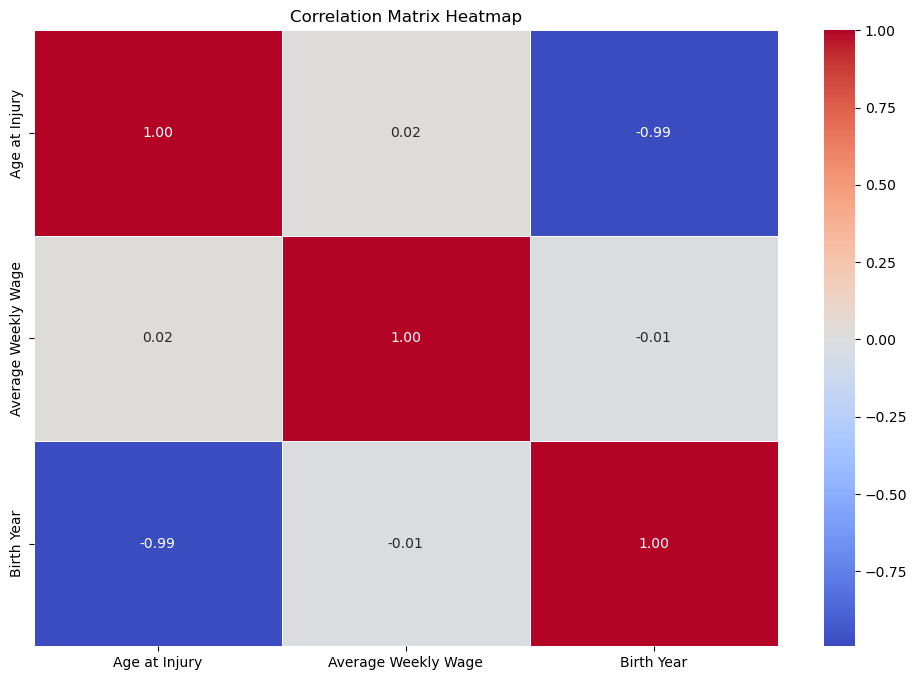

In [77]:
numeric_columns = [col for col in numeric_columns if col in X_train.columns]

# Calculate the correlation matrix
correlation_matrix = X_train[numeric_columns].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<a id="4.6.2.2"></a>

#### 4.6.2.2 Non-Linear Correlation

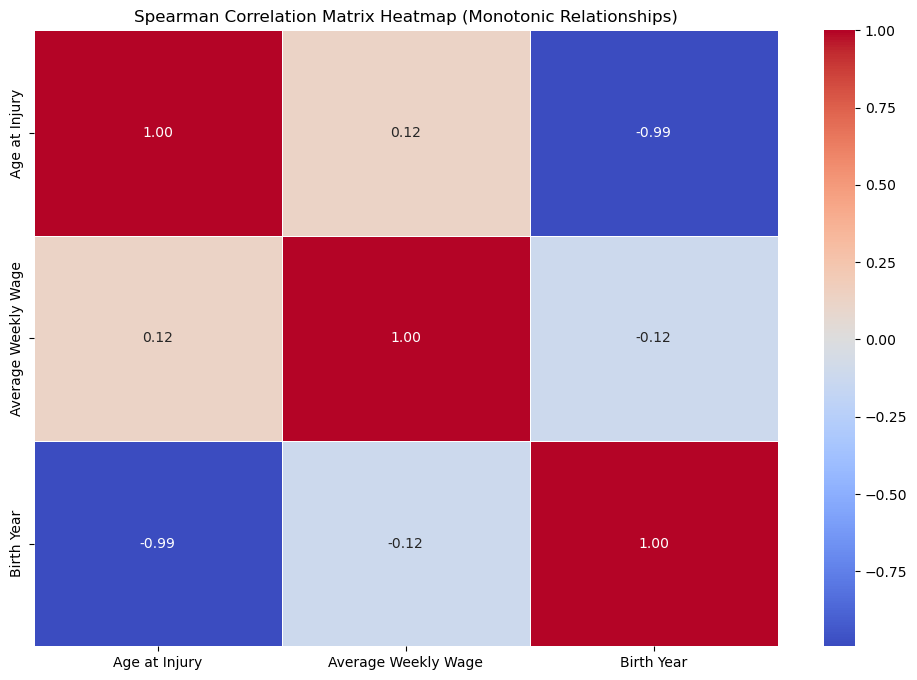

In [78]:
# Calculate the Spearman correlation matrix
correlation_matrix = X_train[numeric_columns].corr(method='spearman')

# Plot the heatmap for the Spearman correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix Heatmap (Monotonic Relationships)')
plt.show()

<a id="4.6.3"></a>

### 4.6.3 Standard Feature Transformations

<a id="4.6.3.1"></a>

#### 4.6.3.1 Logarithmic Transformation

In [79]:
'''
# Apply logarithmic transformation to 'Declaration Time' and 'Conclusion Time'
X_train['Log Declaration Time'] = np.log1p(X_train['Declaration Time'])  # log(1 + x) to handle zeros
X_train['Log Conclusion Time'] = np.log1p(X_train['Conclusion Time'])

# Similarly for validation set
X_val['Log Declaration Time'] = np.log1p(X_val['Declaration Time'])
X_val['Log Conclusion Time'] = np.log1p(X_val['Conclusion Time'])

'''

"\n# Apply logarithmic transformation to 'Declaration Time' and 'Conclusion Time'\nX_train['Log Declaration Time'] = np.log1p(X_train['Declaration Time'])  # log(1 + x) to handle zeros\nX_train['Log Conclusion Time'] = np.log1p(X_train['Conclusion Time'])\n\n# Similarly for validation set\nX_val['Log Declaration Time'] = np.log1p(X_val['Declaration Time'])\nX_val['Log Conclusion Time'] = np.log1p(X_val['Conclusion Time'])\n\n"

In [80]:
'''
sns.histplot(X_train['Log Declaration Time'], kde=True)
plt.title("Log Declaration Time Distribution")
plt.show()

sns.histplot(X_train['Log Conclusion Time'], kde=True)
plt.title("Log Conclusion Time Distribution")
plt.show()

'''

'\nsns.histplot(X_train[\'Log Declaration Time\'], kde=True)\nplt.title("Log Declaration Time Distribution")\nplt.show()\n\nsns.histplot(X_train[\'Log Conclusion Time\'], kde=True)\nplt.title("Log Conclusion Time Distribution")\nplt.show()\n\n'

<a id="4.3.3.2"></a>

#### 4.6.3.2 Polynomial Expansion

In [81]:
'''
# Create polynomial features for Declaration Time and Conclusion Time
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train[['Declaration Time', 'Conclusion Time']])

# Add these polynomial features back into the dataframe
poly_feature_names = poly.get_feature_names_out(['Declaration Time', 'Conclusion Time'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=X_train.index)

X_train = pd.concat([X_train, poly_df], axis=1)

# Repeat for validation data
poly_features_val = poly.transform(X_val[['Declaration Time', 'Conclusion Time']])
poly_df_val = pd.DataFrame(poly_features_val, columns=poly_feature_names, index=X_val.index)

X_val = pd.concat([X_val, poly_df_val], axis=1)

'''

"\n# Create polynomial features for Declaration Time and Conclusion Time\nfrom sklearn.preprocessing import PolynomialFeatures\n\npoly = PolynomialFeatures(degree=2, include_bias=False)\npoly_features = poly.fit_transform(X_train[['Declaration Time', 'Conclusion Time']])\n\n# Add these polynomial features back into the dataframe\npoly_feature_names = poly.get_feature_names_out(['Declaration Time', 'Conclusion Time'])\npoly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=X_train.index)\n\nX_train = pd.concat([X_train, poly_df], axis=1)\n\n# Repeat for validation data\npoly_features_val = poly.transform(X_val[['Declaration Time', 'Conclusion Time']])\npoly_df_val = pd.DataFrame(poly_features_val, columns=poly_feature_names, index=X_val.index)\n\nX_val = pd.concat([X_val, poly_df_val], axis=1)\n\n"

<a id="4.7"></a>

## 4.7 Data Overview

In [82]:
# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Print the categorical columns
print(categorical_columns)

Index(['Carrier Type', 'County of Injury', 'District Name',
       'Medical Fee Region'],
      dtype='object')


In [83]:
# Initiate the stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [84]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [85]:
y_train

Claim Identifier
5588808    5. PPD SCH LOSS
5781745        2. NON-COMP
6089649    5. PPD SCH LOSS
5846683       4. TEMPORARY
5856829       4. TEMPORARY
                ...       
6060162        3. MED ONLY
5397366        2. NON-COMP
5801860       4. TEMPORARY
5699824       1. CANCELLED
5794934    5. PPD SCH LOSS
Name: Claim Injury Type, Length: 459220, dtype: object

In [86]:
y_train = pd.DataFrame(y_train, columns=["Claim Injury Type"])
y_train

Claim Injury Type
Claim Identifier                  
5588808            5. PPD SCH LOSS
5781745                2. NON-COMP
6089649            5. PPD SCH LOSS
5846683               4. TEMPORARY
5856829               4. TEMPORARY
...                            ...
6060162                3. MED ONLY
5397366                2. NON-COMP
5801860               4. TEMPORARY
5699824               1. CANCELLED
5794934            5. PPD SCH LOSS

[459220 rows x 1 columns]

In [87]:
for var in categorical_columns:
    TestIndependence(X_train[var], y_train['Claim Injury Type'], var)

Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction


As we can see after applying the Chi-Square method on the categorical independent variables, we find that all of them are considered important. <br>

<a id="4.8"></a>

## 4.8 Encoding

<a id="4.8.1"></a>

### 4.8.1 One-Hot Encoding

In [88]:
# Accident date in two days since reference
reference_date = pd.to_datetime('1970-01-01')  # Example reference date

# Step 2: Convert 'Accident Date' to days since the reference date
X_train['Accident Date'] = (X_train['Accident Date'] - reference_date).dt.days
X_train['C-2 Date'] = (X_train['C-2 Date'] - reference_date).dt.days
X_train['Assembly Date'] = (X_train['Assembly Date'] - reference_date).dt.days

#### Train

In [89]:
# Now we we will deal with the categorical variables
# Starting with Attorney/Representative 
# We will create a new df called X:train_copy such that we can appluy the necessariy changes in order to apply the Lasso regression for feature selection.
X_train_copy = X_train.copy()
print(X_train['Attorney/Representative'])

# Given we only have Ns and Ys we will change these to binaries, where 0 is No and 1 is Yes
# Replace 'N' with 0 and 'Y' with 1 in the 'Attorney/Representative' column
X_train_copy['Attorney/Representative'] = X_train_copy['Attorney/Representative'].replace({'N': 0, 'Y': 1})
X_train_copy['Attorney/Representative'].astype('int64')

Claim Identifier
5588808    1
5781745    0
6089649    1
5846683    0
5856829    1
          ..
5591126    0
5978147    0
5692431    0
6060162    0
5801860    1
Name: Attorney/Representative, Length: 404412, dtype: int64


Claim Identifier
5588808    1
5781745    0
6089649    1
5846683    0
5856829    1
          ..
5591126    0
5978147    0
5692431    0
6060162    0
5801860    1
Name: Attorney/Representative, Length: 404412, dtype: int64

In [90]:
# Now we we will deal with the categorical variables
# Followed by COVID-19 Indicator
print(X_train_copy['COVID-19 Indicator'].unique())
X_train_copy['COVID-19 Indicator'].astype("int64")

X_train_non_encoded = X_train_copy.copy()

[0 1]


In [91]:
# We will encode the column named as District Name using one hot encoding
X_train_copy["District Name"].unique()
#X_train_copy.shape

array(['BINGHAMTON', 'BUFFALO', 'HAUPPAUGE', 'NYC', 'SYRACUSE', 'ALBANY',
       'ROCHESTER', 'STATEWIDE'], dtype=object)

In [92]:
# Here again we will change N to 0, and Y to 1
X_train_copy['Alternative Dispute Resolution'] = X_train_copy['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 0})

In [93]:
# Carrier Type must also be encoded 
# Create a copy of X_train for encoding
X_train_encoded = X_train_copy.copy()

# Ensure the "Carrier Type" column exists in X_train_encoded
if "Carrier Type" not in X_train_encoded.columns:
    raise ValueError("The column 'Carrier Type' is missing from X_train_encoded!")

# One-hot encode the "Carrier Type" column
X_train_encoded = pd.get_dummies(X_train_encoded, columns=["Carrier Type"], prefix="Carrier", drop_first=False)

# Ensure the "District Name" column exists in X_train_encoded
if "District Name" not in X_train_encoded.columns:
    raise ValueError("The column 'District Name' is missing from X_train_encoded!")

# Ensure there are exactly 8 unique district names
unique_districts = X_train_encoded["District Name"].unique()
if len(unique_districts) != 8:
    raise ValueError(f"Expected 8 unique district names, but found {len(unique_districts)}!")

# One-hot encode the "District Name" column
X_train_encoded = pd.get_dummies(X_train_encoded, columns=["District Name"], prefix="District", drop_first=False)

# Ensure the "County of Injury" column exists in X_train_encoded
if "County of Injury" not in X_train_encoded.columns:
    raise ValueError("The column 'County of Injury' is missing from X_train_encoded!")

if "Medical Fee Region" not in X_train_encoded.columns:
    raise ValueError("Medical Fee Region' is missing from Medical Fee Region!")
X_train_encoded = pd.get_dummies(X_train_encoded, columns=["Medical Fee Region"], prefix="Medical Fee Region", drop_first=False)

# One-hot encode the "County of Injury" column
X_train_encoded = pd.get_dummies(X_train_encoded, columns=["County of Injury"], prefix="County", drop_first=False)

# Display the resulting DataFrame shape
print("After encoding:", X_train_encoded.shape)

After encoding: (404412, 100)


With this we have succesfully transformed the Distrcit Name, County of Injury, and Carrier Name cinto one-hot-encoding

In [94]:
# Modifying the Target variable into float
# Extract only the numbers from the 'Claim Injury Type' column and convert to float
y_train_lean = y_train.copy()  # Create a copy of the DataFrame

# Access the specific column containing the target labels
y_train_lean["Claim Injury Type"] = y_train_lean["Claim Injury Type"].astype(str)
y_train_lean["Claim Injury Type"] = y_train_lean["Claim Injury Type"].str.extract(r'(\d+)').astype(float)

# Check the number of missing values
missing_values = y_train_lean["Claim Injury Type"].isnull().sum()
print(f"Number of missing values: {missing_values}")

# Drop missing values
y_train_lean = y_train_lean.dropna()

# Verify the changes
print(f"Number of missing values after dropping: {y_train_lean['Claim Injury Type'].isnull().sum()}")
print(y_train_lean.head())


Number of missing values: 0
Number of missing values after dropping: 0
                  Claim Injury Type
Claim Identifier                   
5588808                         5.0
5781745                         2.0
6089649                         5.0
5846683                         4.0
5856829                         4.0


In [95]:
# Treating missing values in other columns
average_date = X_train_encoded['Accident Date'].dropna().mean()
X_val['Accident Date'].fillna(average_date, inplace=True)

columns_to_fill = [
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]

train_modes = {col: X_train_encoded[col].dropna().mode()[0] for col in columns_to_fill}
for col in columns_to_fill:
    X_val[col].fillna(train_modes[col], inplace=True)

#### Validation

In [96]:
# Encoding categorical variables
X_val_encoded = X_val.copy()
X_val_encoded = pd.get_dummies(X_val_encoded, columns=["Carrier Type"], prefix="Carrier", drop_first=False)
X_val_encoded = pd.get_dummies(X_val_encoded, columns=["District Name"], prefix="District", drop_first=False)
X_val_encoded = pd.get_dummies(X_val_encoded, columns=["County of Injury"], prefix="County", drop_first=False)
X_val_encoded = pd.get_dummies(X_val_encoded, columns=["Medical Fee Region"], prefix="Medical Fee Region", drop_first=False)

# Step 12: Removing lines with critical missing values
columns_to_check = [
    'Accident Date',
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]
X_val_encoded = X_val_encoded.dropna(subset=columns_to_check)

#### Test

In [97]:
# Encoding 'Gender'
test['Gender'] = test['Gender'].replace(['X'], 'U')
gender_mapping = {'M': 0, 'F': 1, 'U': 2}
test['Gender'] = test['Gender'].map(gender_mapping)

# Encoding 'Attorney/Representative'
test['Attorney/Representative'] = test['Attorney/Representative'].replace({'N': 0, 'Y': 1}).astype('int64')

# Encoding 'COVID-19 Indicator' and 'Alternative Dispute Resolution'
test['COVID-19 Indicator'] = test['COVID-19 Indicator'].map({'N': 0, 'Y': 1})
test['Alternative Dispute Resolution'] = test['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1, 'U': 0})

# One-hot encoding categorical columns
test_encoded = pd.get_dummies(test, columns=["Carrier Type", "District Name", "County of Injury", "Medical Fee Region"], 
                              prefix=["Carrier", "District", "County", "Medical Fee Region"], drop_first=False)

In [98]:
# Fill missing values in 'Accident Date' using the mean from training data
average_date = X_train_encoded['Accident Date'].dropna().mean()
test['Accident Date'].fillna(average_date, inplace=True)

In [99]:
# Filling missing values in date and code columns
average_date = X_train_encoded['Accident Date'].dropna().mean()
test['Accident Date'].fillna(average_date, inplace=True)

columns_to_fill = [
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]
train_modes = {col: X_train_encoded[col].dropna().mode()[0] for col in columns_to_fill}
for col in columns_to_fill:
    test[col].fillna(train_modes[col], inplace=True)

In [127]:
test_encoded.isnull().sum()

Claim Identifier                     0
Accident Date                     2444
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
                                  ... 
Medical Fee Region_I                 0
Medical Fee Region_II                0
Medical Fee Region_III               0
Medical Fee Region_IV                0
Medical Fee Region_UK                0
Length: 109, dtype: int64

<a id="4.9"></a>

## 4.9 Final Verification

#### Validation

In [101]:
# Preprocessing y_val
y_val_lean = y_val.astype(str).str.extract(r'(\d+)').astype(float).dropna()

# Final Verification
print(f"Shape after preprocessing: {X_val_encoded.shape}")
print("First y_val_lean rows:", y_val_lean.head())

Shape after preprocessing: (114701, 102)
First y_val_lean rows:                     0
Claim Identifier     
5888758           5.0
5412745           4.0
5937929           3.0
5785719           3.0
5441248           3.0


#### Test

In [102]:
# Step 13: Final verification
print("After encoding:", test.shape)


After encoding: (387975, 29)


<a id="5"></a>

# 5. Data Scalling
[Back to Contents](#cont)

<a id="5.1"></a>

## 5.1 Minmax Scaler

In [103]:
X_train_scaled_MinMax = X_train_encoded.copy()
datasets_scaling1 = (
    X_train_scaled_MinMax,

)

# Loop through each dataset
for df in datasets_scaling1:
    scaler = MinMaxScaler()  # Initialize RobustScaler

    # Select numeric features only
    all_numeric_features = df.select_dtypes(include=['number']).columns

    # Fit and transform the relevant numeric features
    scaled_data = scaler.fit_transform(df[all_numeric_features])

    # Assign scaled data back to the original DataFrame with proper column names
    X_train_scaled_MinMax[all_numeric_features] = pd.DataFrame(scaled_data, columns=all_numeric_features, index=df.index)

<a id="5.2"></a>

## 5.2 Robust Scaler

In [104]:
X_train_scaled_robust = X_train_encoded.copy()
for df in datasets_scaling1:
    scaler = RobustScaler()  # Initialize RobustScaler

    # Select numeric features only
    all_numeric_features = df.select_dtypes(include=['number']).columns

    # Fit and transform the relevant numeric features
    scaled_data = scaler.fit_transform(df[all_numeric_features])

    # Assign scaled data back to the original DataFrame with proper column names
    X_train_scaled_robust[all_numeric_features] = pd.DataFrame(scaled_data, columns=all_numeric_features, index=df.index)

<a id="5.3"></a>

## 5.3 Standard Scaler

In [105]:
X_train_scaled_standard = X_train_encoded.copy()
for df in datasets_scaling1:
    scaler = StandardScaler()  # Initialize RobustScaler

    # Select numeric features only
    all_numeric_features = df.select_dtypes(include=['number']).columns

    # Fit and transform the relevant numeric features
    scaled_data = scaler.fit_transform(df[all_numeric_features])

    # Assign scaled data back to the original DataFrame with proper column names
    X_train_scaled_standard[all_numeric_features] = pd.DataFrame(scaled_data, columns=all_numeric_features, index=df.index)

<a id="6"></a>

# 6. Feature Selection
[Back to Contents](#cont)

In [106]:
# Remove all the columns as disucussed in pre-processing
columns_to_drop = [
    'C-3 Date',
    'First Hearing Date',
    'IME-4 Count',
    'Industry Code Description',
    'OIICS Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Description',
    'WCIO Part OF Body Description',
    'Zip Code',
    'WCB Decision'
]

X_train_encoded = X_train_encoded.drop(columns=columns_to_drop, errors='ignore')

<a id="6.1"></a>

## 6.1 Lasso

 With standardized data via Standard Scaler, since it is the best performer relative to MinMax adn Robust Scaler.

In [107]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print("Columns with missing values and their counts:")
print(missing_columns)



Columns with missing values and their counts:
Series([], dtype: int64)


In [108]:
y_val_lean = y_val_lean.rename(columns={0: "Claim Injury Type"})


In [109]:
# Join up Xs and ys by Claim Identfiier as the dataframes werre manipulated adn cleaned
# Merge the two datasets on the "Claim Identifier" index
merged_df = pd.merge(
    X_val_encoded,  # Feature dataset
    y_val_lean,     # Target dataset
    left_index=True,  # Use the index of X_val_encoded
    right_index=True  # Use the index of y_val_lean
)
# Rename the unnamed or misnamed column to "Claim Injury Type" if needed
if 0 in merged_df.columns:
    merged_df = merged_df.rename(columns={0: "Claim Injury Type"})

# Proceed to split the DataFrame
X_val_encoded = merged_df.drop(columns=["Claim Injury Type"])  # All columns except 'Claim Injury Type'
y_val_lean = merged_df[["Claim Injury Type"]]  # Only the 'Claim Injury Type' column

# Ensure the "Claim Identifier" remains as the index for both
X_val_encoded.index.name = "Claim Identifier"
y_val_lean.index.name = "Claim Identifier"

# Merge the two datasets on the "Claim Identifier" index
merged_df = pd.merge(
    X_train_encoded,  # Feature dataset
    y_train_lean,     # Target dataset
    left_index=True,  # Use the index of X_train_encoded
    right_index=True  # Use the index of y_train_lean
)

# Rename the unnamed or misnamed column to "Claim Injury Type" if needed
if 0 in merged_df.columns:
    merged_df = merged_df.rename(columns={0: "Claim Injury Type"})

# Proceed to split the DataFrame
X_train_encoded = merged_df.drop(columns=["Claim Injury Type"])  # All columns except 'Claim Injury Type'
y_train_lean = merged_df[["Claim Injury Type"]]  # Only the 'Claim Injury Type' column

# Ensure the "Claim Identifier" remains as the index for both
X_train_encoded.index.name = "Claim Identifier"
y_train_lean.index.name = "Claim Identifier"


Shape of coefficients: (3, 100)
Length of features_first_half: 50
Shape of coefficients_first_half: (3, 50)
Length of features_second_half: 50
Shape of coefficients_second_half: (3, 50)


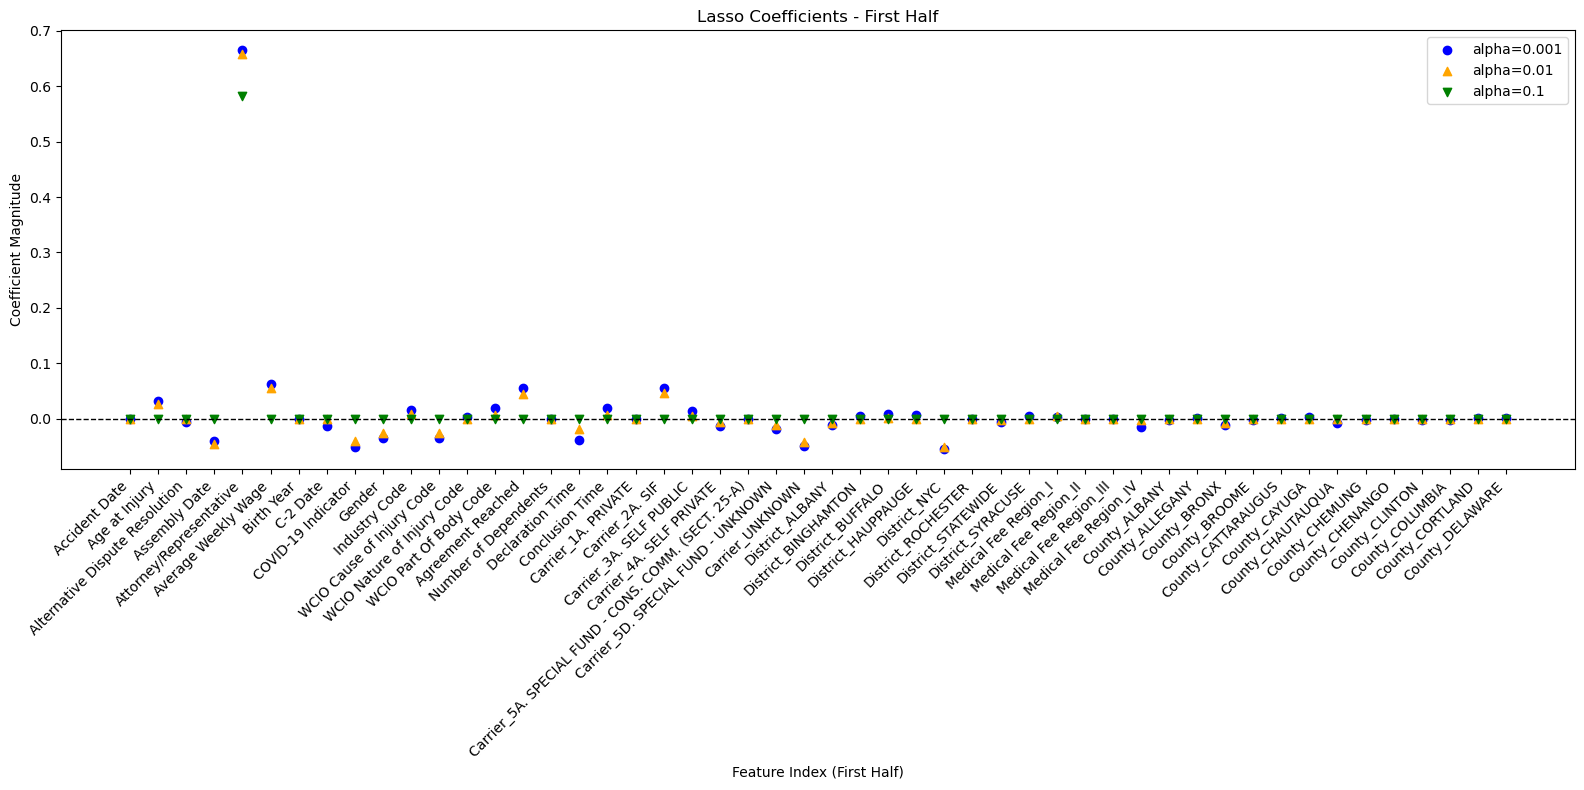

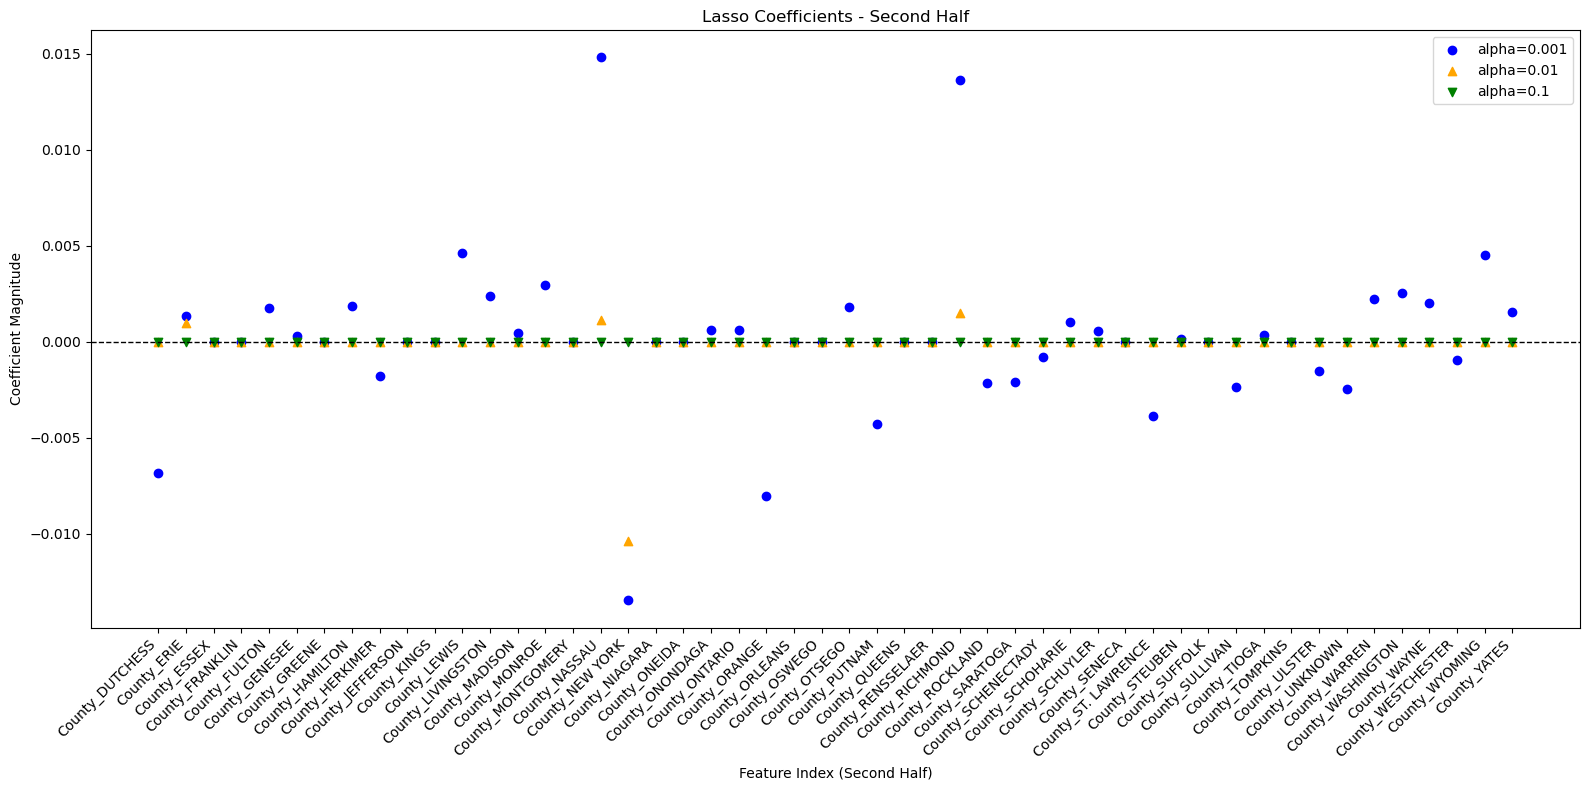

In [110]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)

# Step 2: Train Lasso models with different alpha values
alphas = [0.001, 0.01, 0.1]
coefficients = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_scaled, y_train_lean)  # Use scaled X
    coefficients.append(lasso.coef_)

# Convert coefficients to a NumPy array for easier slicing
coefficients = np.array(coefficients)

# Step 3: Split the features and coefficients into two halves
half = len(X_scaled.columns) // 2
features_first_half = X_scaled.columns[:half]
features_second_half = X_scaled.columns[half:]

coefficients_first_half = coefficients[:, :half]
coefficients_second_half = coefficients[:, half:]

# Verify shapes
print(f"Shape of coefficients: {coefficients.shape}")
print(f"Length of features_first_half: {len(features_first_half)}")
print(f"Shape of coefficients_first_half: {coefficients_first_half.shape}")
print(f"Length of features_second_half: {len(features_second_half)}")
print(f"Shape of coefficients_second_half: {coefficients_second_half.shape}")

# Step 4: Plot for the first half of features
plt.figure(figsize=(16, 8))
markers = ['o', '^', 'v']
colors = ['b', 'orange', 'green']

for i, alpha in enumerate(alphas):
    plt.scatter(
        range(len(features_first_half)),
        coefficients_first_half[i],
        label=f'alpha={alpha}',
        marker=markers[i],
        color=colors[i]
    )

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(range(len(features_first_half)), features_first_half, rotation=45, ha='right')
plt.ylabel("Coefficient Magnitude")
plt.xlabel("Feature Index (First Half)")
plt.title("Lasso Coefficients - First Half")
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Plot for the second half of features
plt.figure(figsize=(16, 8))

for i, alpha in enumerate(alphas):
    plt.scatter(
        range(len(features_second_half)),
        coefficients_second_half[i],
        label=f'alpha={alpha}',
        marker=markers[i],
        color=colors[i]
    )

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(range(len(features_second_half)), features_second_half, rotation=45, ha='right')
plt.ylabel("Coefficient Magnitude")
plt.xlabel("Feature Index (Second Half)")
plt.title("Lasso Coefficients - Second Half")
plt.legend()
plt.tight_layout()
plt.show()

In [111]:
# Step 1: Combine feature names and coefficients into a DataFrame
feature_names = X_scaled.columns  # Feature names after scaling
coeffs_df = pd.DataFrame(
    coefficients.T, 
    columns=[f'alpha={alpha}' for alpha in alphas],
    index=feature_names
)

# Step 2: Filter features with at least one non-zero coefficient
positive_features = coeffs_df[(coeffs_df != 0).any(axis=1)]

# Step 3: Display the table
print("Positive Absolute Features for Different Alphas:")
positive_features.iloc[:40, :]

Positive Absolute Features for Different Alphas:


alpha=0.001  alpha=0.01  \
Age at Injury                                          0.032558    0.026452   
Alternative Dispute Resolution                        -0.006093   -0.000000   
Assembly Date                                         -0.040640   -0.045210   
Attorney/Representative                                0.664701    0.657120   
Average Weekly Wage                                    0.063286    0.055391   
C-2 Date                                              -0.012705   -0.000000   
COVID-19 Indicator                                    -0.051077   -0.039317   
Gender                                                -0.034101   -0.025617   
Industry Code                                          0.015120    0.009094   
WCIO Cause of Injury Code                             -0.033954   -0.026309   
WCIO Nature of Injury Code                             0.002447    0.000000   
WCIO Part Of Body Code                                 0.018882    0.007009   
Agreement Reached                                      0.054957    0.044729   
Declaration Time                                      -0.037650   -0.018717   
Conclusion Time                                        0.019969    0.006813   
Carrier_2A. SIF                                        0.056362    0.046454   
Carrier_3A. SELF PUBLIC                                0.014249    0.005750   
Carrier_4A. SELF PRIVATE                              -0.012631   -0.005879   
Carrier_5A. SPECIAL FUND - CONS. COMM. (SECT. 2...    -0.000496   -0.000000   
Carrier_5D. SPECIAL FUND - UNKNOWN                    -0.018042   -0.010517   
Carrier_UNKNOWN                                       -0.049326   -0.042497   
District_ALBANY                                       -0.012047   -0.007937   
District_BINGHAMTON                                    0.004640    0.000000   
District_BUFFALO                                       0.008609    0.000743   
District_HAUPPAUGE                                     0.006939    0.000000   
District_NYC                                          -0.055463   -0.051410   
District_STATEWIDE                                    -0.006597   -0.001946   
District_SYRACUSE                                      0.004264    0.000000   
Medical Fee Region_I                                   0.003402    0.005834   
Medical Fee Region_IV                                 -0.015581   -0.001389   
County_ALBANY                                         -0.001783   -0.000000   
County_ALLEGANY                                        0.001117    0.000000   
County_BRONX                                          -0.011135   -0.008024   
County_BROOME                                         -0.001802    0.000000   
County_CATTARAUGUS                                     0.001199    0.000000   
County_CAYUGA                                          0.003464    0.000000   
County_CHAUTAUQUA                                     -0.006770   -0.000000   
County_CHEMUNG                                        -0.002372   -0.000000   
County_CLINTON                                        -0.001909   -0.000000   
County_COLUMBIA                                       -0.001710   -0.000000   

                                                    alpha=0.1  
Age at Injury                                        0.000000  
Alternative Dispute Resolution                      -0.000000  
Assembly Date                                       -0.000000  
Attorney/Representative                              0.582973  
Average Weekly Wage                                  0.000000  
C-2 Date                                            -0.000000  
COVID-19 Indicator                                  -0.000000  
Gender                                              -0.000000  
Industry Code                                        0.000000  
WCIO Cause of Injury Code                           -0.000000  
WCIO Nature of Injury Code                          -0.000000  
WCIO Part Of Body Code                      

In [112]:
# Extract feature names where coefficients are non-zero for alpha=0.001
features_alpha_001 = coeffs_df[coeffs_df['alpha=0.001'] > 0].index.tolist()

# Print the list of feature names
print("Features with positive coefficients when alpha=0.001:")
print(features_alpha_001)

Features with positive coefficients when alpha=0.001:
['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage', 'Industry Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Conclusion Time', 'Carrier_2A. SIF', 'Carrier_3A. SELF PUBLIC', 'District_BINGHAMTON', 'District_BUFFALO', 'District_HAUPPAUGE', 'District_SYRACUSE', 'Medical Fee Region_I', 'County_ALLEGANY', 'County_CATTARAUGUS', 'County_CAYUGA', 'County_CORTLAND', 'County_DELAWARE', 'County_ERIE', 'County_FULTON', 'County_GENESEE', 'County_HAMILTON', 'County_LEWIS', 'County_LIVINGSTON', 'County_MADISON', 'County_MONROE', 'County_NASSAU', 'County_ONONDAGA', 'County_ONTARIO', 'County_OTSEGO', 'County_RICHMOND', 'County_SCHOHARIE', 'County_SCHUYLER', 'County_STEUBEN', 'County_TIOGA', 'County_WARREN', 'County_WASHINGTON', 'County_WAYNE', 'County_WYOMING', 'County_YATES']


<a id="6.2"></a>

## 6.2 Chi-square

In [113]:
# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Print the categorical columns
print(categorical_columns)

Index(['Carrier Type', 'County of Injury', 'District Name',
       'Medical Fee Region'],
      dtype='object')


In [114]:
# Initiate the stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [115]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [116]:
for var in categorical_columns:
    TestIndependence(X_train[var], y_train['Claim Injury Type'], var)

Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction


In [117]:
chi_features = [
    "Alternative Dispute Resolution",
    "Attorney/Representative",
    "Carrier Type",
    "County of Injury",
    "COVID-19 Indicator",
    "District Name" ]

In [118]:
filtered_features_regress = list(features_alpha_001) + [
    feature for feature in chi_features if feature not in features_alpha_001
]

<a id="6.3"></a>

## 6.3 RFE

In [119]:
"""

# Number of features
nof_list=np.arange(1,25)            
high_score=0
# Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled_standard,y_train_final)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

"""

'\n\n# Number of features\nnof_list=np.arange(1,25)            \nhigh_score=0\n# Variable to store the optimum features\nnof=0           \ntrain_score_list =[]\nval_score_list = []\n\nfor n in range(len(nof_list)):\n    model = LogisticRegression()\n    \n    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])\n    X_train_rfe = rfe.fit_transform(X_train_scaled_standard,y_train_final)\n    X_val_rfe = rfe.transform(X_val)\n    model.fit(X_train_rfe,y_train)\n    \n    #storing results on training data\n    train_score = model.score(X_train_rfe,y_train)\n    train_score_list.append(train_score)\n    \n    #storing results on training data\n    val_score = model.score(X_val_rfe,y_val)\n    val_score_list.append(val_score)\n    \n    #check best score\n    if(val_score >= high_score):\n        high_score = val_score\n        nof = nof_list[n]\n\n        #adding mention of variables to keep\n        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns

In [120]:
# Convert Claim Identifier (index) into a column
test_encoded = test_encoded.reset_index()

<a id="7"></a>

# 7. Modelling
[Back to Contents](#cont)

<a id="7.1"></a>

## 7.1 KNN Classifier

We will initiate this process by fitting the KNN into the pre-processed train dataset. 
An important assumption need for the knn, is a balanced target variable. In case the target variable is not balanced, the nature of the data can lead to biased classifier, as it will inclince towards the ovesampled category.
Given the nature of the explanatory variable and due to outliers having been handled, we will use the dataframe scaled via the MinMaxScaler

In [121]:
class_counts_dict = y_train_lean.value_counts().to_dict()
print(class_counts_dict)

{(2.0,): 203953, (4.0,): 107604, (3.0,): 50313, (5.0,): 35187, (1.0,): 3910, (6.0,): 3068, (8.0,): 306, (7.0,): 71}


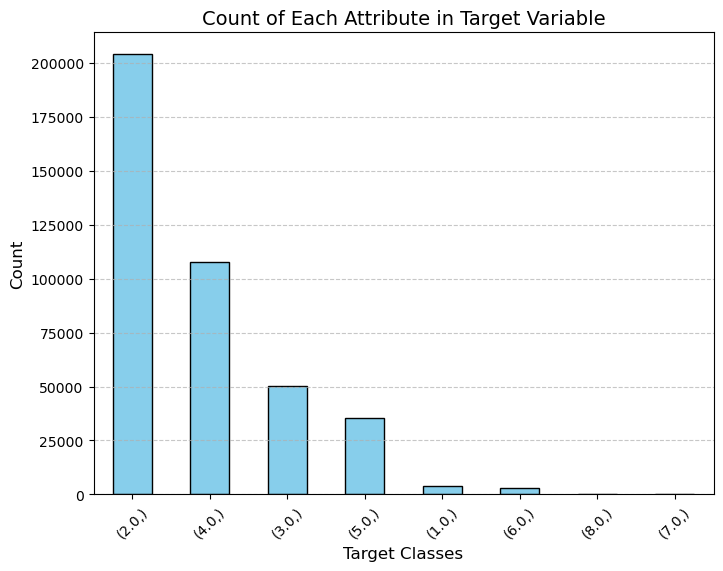

In [122]:
class_counts = y_train_lean .value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Attribute in Target Variable', fontsize=14)
plt.xlabel('Target Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [123]:
# Define the mapping using the provided array
label_mapping = {
    2.0: "2. NON-COMP",
    5.0: "5. PPD SCH LOSS",
    4.0: "4. TEMPORARY",
    3.0: "3. MED ONLY",
    6.0: "6. PPD NSL",
    1.0: "1. CANCELLED",
    7.0: "7. PTD",
    8.0: "8. DEATH",
}

# Map the numeric labels in y_train_lean to descriptive labels
y_train_final = y_train_lean["Claim Injury Type"].map(label_mapping)

# Reset the index to match the structure of y_train_final
y_train_final = y_train_final.reset_index(drop=True).rename("Claim Injury Type")

# Display the first few rows of y_train_final to verify
print(y_train_final.head())

# Given the imbalance in the target variable, we will use weights to balance these out to avoid biasis in the model:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train_final)  # Extract unique classes from your data

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_final)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Convert class labels to integers and retain the weights
class_weight_dict = {
    int(float(cls.split('.')[0])): weight for cls, weight in class_weight_dict.items()
}
class_weight_dict

0    5. PPD SCH LOSS
1        2. NON-COMP
2    5. PPD SCH LOSS
3       4. TEMPORARY
4       4. TEMPORARY
Name: Claim Injury Type, dtype: object


{1: 12.928772378516625,
 2: 0.24785857525998636,
 3: 1.004740325561982,
 4: 0.4697920151667224,
 5: 1.4366527410691448,
 6: 16.477020860495436,
 7: 711.9929577464789,
 8: 165.20098039215685}

In [124]:
# Remove NaN values from distinct_values
distinct_values = y_train['Claim Injury Type'].unique()  # Get unique values
distinct_values = [value for value in distinct_values if not pd.isna(value)]  # Filter out NaN
distinct_values

# Create a dictionary where the number (first part of the string) is the key
# and the number with the text, separated by ". ", is the value
number_to_text_dict = {}

for value in distinct_values:
    if isinstance(value, str):  # Ensure the value is a string
        number, text = value.split('.', 1)  # Split on the first '.' to separate the number and the text
        number_to_text_dict[int(number.strip())] = f"{number.strip()}. {text.strip()}"  # Add a space after the period

print("Dictionary (Number as Key, Number. Text as Value):", number_to_text_dict)


Dictionary (Number as Key, Number. Text as Value): {5: '5. PPD SCH LOSS', 2: '2. NON-COMP', 4: '4. TEMPORARY', 1: '1. CANCELLED', 3: '3. MED ONLY', 6: '6. PPD NSL', 8: '8. DEATH', 7: '7. PTD'}


In [125]:
'''
# Step 1: Align all datasets to the filtered features
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_aligned.squeeze()  # Ensure y_val_aligned is a 1D array

# Step 2: Use your class weight dictionary
class_weight_dict

# Calculate sample weights
sample_weights = y_val_aligned.map(class_weight_dict)

# Step 3: Create the pipeline with scaling and KNN
pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', KNeighborsClassifier())  # KNN classifier
])

# Step 4: Define the parameter grid for Grid Search
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],     # Test different values of k
    'model__weights': ['uniform', 'distance'],  # Uniform or distance weights
    'model__metric': ['euclidean', 'manhattan'] # Distance metrics
}

# Step 5: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search on the training set with sample weights
grid_search.fit(X_train_aligned, y_train_lean, model__sample_weight=sample_weights)

# Step 6: Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Predict on the validation set using the best model
best_pipeline_knn = grid_search.best_estimator_
y_pred = best_pipeline_knn.predict(X_val_encoded_aligned)

# Step 8: Evaluate the model
print("Accuracy on Validation Set:", accuracy_score(y_val_aligned, y_pred))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_aligned, y_pred))

'''

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\carol\anaconda3\envs\DM2425\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\carol\anaconda3\envs\DM2425\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\carol\anaconda3\envs\DM2425\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\carol\anaconda3\envs\DM2425\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: KNeighborsClassifier.fit() got an unexpected keyword argument 'sample_weight'


In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_aligned.squeeze()  # Ensure y_val_aligned is a 1D array

# Step 2: Use your class weight dictionary
class_weight_dict

# Calculate sample weights
sample_weights = y_val_aligned.map(class_weight_dict)

# Step 3: Create the pipeline with scaling and KNN
pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', KNeighborsClassifier())  # KNN classifier
])

# Step 4: Define the parameter grid for Grid Search
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],     # Test different values of k
    'model__weights': ['uniform', 'distance'],  # Uniform or distance weights
    'model__metric': ['euclidean', 'manhattan'] # Distance metrics
}

# Step 5: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1)

# Fit Grid Search on the training set (without sample_weight in the fit method)
grid_search.fit(X_train_aligned, y_train_lean)  # Removed model__sample_weight from here

# Step 6: Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Predict on the validation set using the best model
best_pipeline_knn = grid_search.best_estimator_
y_pred = best_pipeline_knn.predict(X_val_encoded_aligned)

# Step 8: Evaluate the model
print("Accuracy on Validation Set:", accuracy_score(y_val_aligned, y_pred))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_aligned, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


<a id="7.2"></a>

## 7.2 SVC

In [ ]:
# Step 1: Align all datasets (train, val, test) with the filtered features
common_columns = list(set(filtered_features_regress) & set(X_train_encoded.columns) & 
                      set(X_val_encoded.columns) & set(test_encoded.columns))

# Align the datasets
X_train_aligned = X_train_encoded.reindex(columns=common_columns, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=common_columns, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=common_columns, fill_value=0)

# Ensure y_val and y_test are aligned with their respective X data
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Step 2: Define a pipeline with MinMaxScaler and LinearSVC
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', LinearSVC(class_weight=class_weight_dict, dual=False))  # LinearSVC with class weights
])

# Step 3: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],     # Regularization strength
    'model__max_iter': [1000, 5000, 10000],        # Maximum iterations
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform GridSearchCV on the training set
grid_search.fit(X_train_aligned, y_train_lean.values.ravel())

# Print the best hyperparameters
print("Best Hyperparameters (from Validation Set):", grid_search.best_params_)

# Step 4: Train the pipeline using the best hyperparameters
SVC_pipeline = grid_search.best_estimator_
SVC_pipeline.fit(X_train_aligned, y_train_lean.values.ravel())

# Step 5: Make predictions on validation and test datasets
y_val_pred = SVC_pipeline.predict(X_val_encoded_aligned)
y_test_pred = SVC_pipeline.predict(test_encoded_aligned)

# Step 6: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 7: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_svc_output = test_encoded[["Claim Identifier"]].copy()
kaggle_svc_output["Claim Injury Type"] = y_test_pred_text

# Step 8: Display the DataFrame to verify the format
print(kaggle_svc_output.head())

# Step 9: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

<a id="7.3"></a>

## 7.3 Logistic Regression

In [ ]:
# Step 1: Use filtered_features_regress as the baseline
# Align all datasets (train, val, test) to the filtered features
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Step 2: Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Step 3: Compute Class Weight Dictionary
class_weight_dict

# Step 4: Define the pipeline with MinMaxScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', LogisticRegression(class_weight=class_weight_dict))  # Logistic Regression with class weights
])

# Step 5: Set up GridSearchCV for hyperparameter tuning
param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],     # Regularization strength
    'model__max_iter': [1000, 5000, 10000],        # Maximum iterations
    'model__solver': ['lbfgs', 'liblinear'],       # Solvers
}

# Perform GridSearchCV on the validation data
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Step 6: Fit GridSearchCV on the validation data
grid_search.fit(X_val_encoded_aligned, y_val_aligned)

# Step 7: Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 8: Train Logistic Regression using the best hyperparameters
logreg_pipeline = grid_search.best_estimator_
logreg_pipeline.fit(X_train_aligned, y_train_lean)

# Step 9: Make predictions on the validation set
y_pred_val_logreg = logreg_pipeline.predict(X_val_encoded_aligned)

# Step 10: Evaluate predictions on the validation set
print("Accuracy on Validation Set:", accuracy_score(y_val_aligned, y_pred_val_logreg))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_aligned, y_pred_val_logreg))

<a id="7.4"></a>

## 7.4 Decision Tree

In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_lean

# Step 2: Use your class weight dictionary
# Assuming class_weight_dict is already defined

# Step 3: Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples in a leaf
    'class_weight': [class_weight_dict],    # Use the class weight dictionary
}

# Step 4: Set up GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Step 5: Train the model using GridSearchCV
grid_search.fit(X_train_aligned, y_train_lean.values.ravel())

# Step 6: Extract the best model and print the best parameters
best_dt_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Make predictions on the validation and test datasets using the best model
y_val_pred = best_dt_model.predict(X_val_encoded_aligned)
y_test_pred = best_dt_model.predict(test_encoded_aligned)

# Step 8: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 9: Combine the predictions with the Claim Identifier column
kaggle_output = test_encoded.copy()  # Start with the test dataset
kaggle_output = kaggle_output[["Claim Identifier"]].copy()  # Retain only the Claim Identifier column
kaggle_output["Claim Injury Type"] = y_test_pred_text  # Add the predicted values in "number.text" format

# Step 10: Display the DataFrame to verify the format
print(kaggle_output.head())

# Step 11: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

<a id="7.5"></a>

## 7.5 Random Forest

In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_encoded_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_aligned.squeeze()  # Ensure y_val_aligned is a 1D array

# Step 2: Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],          # Number of trees
    'max_depth': [10, 20, None],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],            # Minimum number of samples required in each leaf
    'class_weight': [None, 'balanced', class_weight_dict]  # Class weight options
}

# Step 3: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train using GridSearchCV
grid_search.fit(X_train_encoded_aligned, y_train_lean.values.ravel())

# Print the best hyperparameters
print("Best Hyperparameters (from GridSearchCV):", grid_search.best_params_)

# Step 4: Train the Random Forest model using the best hyperparameters
rf_model = grid_search.best_estimator_

# Step 5: Make predictions on the validation and test datasets
y_val_pred = rf_model.predict(X_val_encoded_aligned)
y_test_pred = rf_model.predict(test_encoded_aligned)

# Step 6: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_val_pred_text = [number_to_text_dict[int(pred)] for pred in y_val_pred]
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 7: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_rf_output = test_encoded[["Claim Identifier"]].copy()
kaggle_rf_output["Claim Injury Type"] = y_test_pred_text

# Step 8: Display the DataFrame to verify the format
print(kaggle_rf_output.head())

# Step 9: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

<a id="7.6"></a>

## 7.6 Neural Networks

In [ ]:
# Step 1: Align all datasets (train, val, test) with the filtered features
# Use filtered_features_regress as the baseline
common_columns = list(set(filtered_features_regress) & set(X_train_encoded.columns) & 
                      set(X_val_encoded.columns) & set(test_encoded.columns))

# Align the datasets
X_train_aligned = X_train_encoded.reindex(columns=common_columns, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=common_columns, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=common_columns, fill_value=0)

# Ensure y_val and y_test are aligned with their respective X data
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Step 2: Define a pipeline with MinMaxScaler and MLPClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', MLPClassifier(random_state=42))  # MLPClassifier
])

# Step 3: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'model__hidden_layer_sizes': [(100,), (50, 50), (200,)],  # Different hidden layer sizes
    'model__activation': ['relu', 'tanh'],  # Activation functions
    'model__solver': ['adam', 'sgd'],  # Solvers
    'model__max_iter': [300, 500]  # Maximum iterations
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train_aligned, y_train_lean)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 5: Train the pipeline using the best hyperparameters
best_mlp_pipeline = grid_search.best_estimator_
best_mlp_pipeline.fit(X_train_aligned, y_train_lean)

# Step 6: Make predictions on the validation set
y_pred_mlp = best_mlp_pipeline.predict(X_val_encoded_aligned)

# Step 7: Evaluate the predictions on validation set
print("Accuracy on Validation Set:", accuracy_score(y_val_aligned, y_pred_mlp))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_aligned, y_pred_mlp))

<a id="7.7"></a>

## 7.7 XGBoost

In [ ]:
# Step 1: Use filtered_features_regress as the baseline
# Align all datasets (train, val, test) to the filtered features
common_columns = list(set(filtered_features_regress) & set(X_train_encoded.columns) & 
                      set(X_val_encoded.columns) & set(test_encoded.columns))

X_train_aligned = X_train_encoded.reindex(columns=common_columns, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=common_columns, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=common_columns, fill_value=0)

# Step 2: Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Step 3: Ensure target variables are 1D and shift them by -1
y_train_shifted = y_train_lean - 1
y_val_shifted = y_val_aligned - 1
y_test_shifted = y_test_aligned - 1

# Step 4: Define the pipeline with MinMaxScaler and XGBoost
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weight_dict))  # XGBoost Classifier with class weights
])

# Step 5: Set up GridSearchCV for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],  # Number of trees
    'model__learning_rate': [0.1, 0.01],  # Step size shrinkage
    'model__max_depth': [4, 6, 8],  # Maximum depth of a tree
    'model__subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
    'model__colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features used for training each tree
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

<a id="8"></a>

# 8. Algorithms with Optimal Hyperparameters and Kaggle Output
[Back to Contents](#cont)

<a id="8.1"></a>

## 8.1 KNN

In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_aligned.squeeze()  # Ensure y_val_aligned is a 1D array

# Step 2: Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_MinMax = scaler.fit_transform(X_train_aligned)
X_val_scaled_MinMax = scaler.transform(X_val_encoded_aligned)
test_scaled_MinMax = scaler.transform(test_encoded_aligned)

# Step 3: Initialize KNN model with specified parameters
best_knn_model = KNeighborsClassifier(
    n_neighbors=5,       # Set to 5 as an example; adjust as needed
    weights='uniform',   # Uniform weighting of neighbors
    metric='euclidean'   # Use Euclidean distance
)

# Step 4: Train the KNN model on the scaled training data
best_knn_model.fit(X_train_scaled_MinMax, y_train_lean.values.ravel())

# Step 5: Make predictions on the validation and test datasets
y_val_pred = best_knn_model.predict(X_val_scaled_MinMax)
y_test_pred = best_knn_model.predict(test_scaled_MinMax)

# Step 6: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 7: Combine the predictions with the Claim Identifier column
kaggle_output_knn = test_encoded.copy()  # Start with the test dataset
kaggle_output_knn = kaggle_output_knn[["Claim Identifier"]].copy()  # Retain only the Claim Identifier column
kaggle_output_knn["Claim Injury Type"] = y_test_pred_text  # Add the predicted values in "number.text" format

# Step 8: Display the DataFrame to verify the format
print(kaggle_output_knn.head())

# Step 9: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

In [ ]:
# Export the Kaggle DataFrame for KNN submission
try:
    kaggle_output_knn.to_csv('kaggle_submission_knn.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_knn.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")

<a id="8.2"></a>

## 8.2. SVC

In [ ]:
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
test_encoded_aligned, y_test_aligned = test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Step 2: Create the pipeline with MinMaxScaler and LinearSVC
pipeline_svc = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', LinearSVC(
        C=100.0,                # Regularization parameter
        max_iter=1000,          # Maximum number of iterations
        random_state=42,        # Random state for reproducibility
        class_weight=class_weight_dict  # Custom class weight dictionary for balancing
    ))
])

# Step 3: Train the pipeline with the training dataset
pipeline_svc.fit(X_train_aligned, y_train_lean.values.ravel())

# Step 4: Make predictions on the validation and test datasets
y_val_pred = pipeline_svc.predict(X_val_encoded_aligned)
y_test_pred = pipeline_svc.predict(test_encoded_aligned)

# Step 5: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 6: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_svc_output = test_encoded[["Claim Identifier"]].copy()  # Use the test dataset
kaggle_svc_output["Claim Injury Type"] = y_test_pred_text  # Add the predicted values in "number.text" format

# Step 7: Display the DataFrame to verify the format
print(kaggle_svc_output.head())

# Step 8: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

In [ ]:
# Export the Kaggle DataFrame for SVC submission
try:
    kaggle_svc_output.to_csv('kaggle_submission_svc.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_svc.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")

<a id="8.3"></a>

## 8.3. Logistic Regression

In [ ]:
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Step 2: Create the pipeline with MinMaxScaler and Logistic Regression
pipeline_logistic = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', LogisticRegression(
        C=100.0,                # Regularization strength
        max_iter=1000,          # Maximum number of iterations
        random_state=42,        # Random state for reproducibility
        solver='liblinear',     # Solver for optimization
        class_weight=class_weight_dict  # Custom class weight dictionary for balancing
    ))
])

# Step 3: Train the pipeline with the training dataset
pipeline_logistic.fit(X_train_aligned, y_train_lean.values.ravel())

# Step 4: Make predictions on the validation and test datasets
y_val_pred = pipeline_logistic.predict(X_val_encoded_aligned)
y_test_pred = pipeline_logistic.predict(test_encoded_aligned)

# Step 5: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 6: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_logistic_output = test_encoded[["Claim Identifier"]].copy()  # Use the test dataset
kaggle_logistic_output["Claim Injury Type"] = y_test_pred_text  # Add the predicted values in "number.text" format

# Step 7: Display the DataFrame to verify the format
print(kaggle_logistic_output.head())

# Step 8: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

In [ ]:
# Export the Kaggle DataFrame for Logistic Regression submission
try:
    kaggle_logistic_output.to_csv('kaggle_submission_logistic.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_logistic.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")


<a id="8.4"></a>

## 8.4. Decision Tree

In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_encoded_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_aligned.squeeze()

# Step 2: Create the Decision Tree model with specified hyperparameters
dt_model = DecisionTreeClassifier(
    max_depth=None,         # Maximum depth of the tree
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required in each leaf
    random_state=42,        # Random seed for reproducibility
    class_weight=class_weight_dict  # Use the class weight dictionary
)

# Step 3: Train the model with the training dataset
dt_model.fit(X_train_encoded_aligned, y_train_lean.values.ravel())

# Step 4: Make predictions on the validation and test datasets
y_val_pred = dt_model.predict(X_val_encoded_aligned)
y_test_pred = dt_model.predict(test_encoded_aligned)

# Step 5: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_val_pred_text = [number_to_text_dict[int(pred)] for pred in y_val_pred]
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 6: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_dt_output = test_encoded[["Claim Identifier"]].copy()
kaggle_dt_output["Claim Injury Type"] = y_test_pred_text

# Step 7: Display the DataFrame to verify the format
print(kaggle_dt_output.head())

# Step 8: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

In [ ]:
# Export the Kaggle DataFrame for Random Forest submission
try:
    kaggle_dt_output.to_csv('kaggle_submission_dt.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_dt.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")

<a id="8.5"></a>

## 8.5. Random Forest

In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_encoded_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Ensure target variables are 1D
y_val_aligned = y_val_aligned.squeeze()

# Step 2: Create the Random Forest model with specified hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of the trees
    min_samples_split=2,    # Minimum number of samples required to split a node
    min_samples_leaf=1,     # Minimum number of samples required in each leaf
    random_state=42,        # Random seed for reproducibility
    class_weight=class_weight_dict      # No explicit class weighting
)

# Step 3: Train the model with the training dataset
rf_model.fit(X_train_encoded_aligned, y_train_lean.values.ravel())

# Step 4: Make predictions on the validation and test datasets
y_val_pred = rf_model.predict(X_val_encoded_aligned)
y_test_pred = rf_model.predict(test_encoded_aligned)

# Step 5: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_val_pred_text = [number_to_text_dict[int(pred)] for pred in y_val_pred]
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred]

# Step 6: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_rf_output = test_encoded[["Claim Identifier"]].copy()
kaggle_rf_output["Claim Injury Type"] = y_test_pred_text

# Step 7: Display the DataFrame to verify the format
print(kaggle_rf_output.head())

# Step 8: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

In [ ]:
# Export the Kaggle DataFrame for Random Forest submission
try:
    kaggle_rf_output.to_csv('kaggle_submission.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_rf.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")

<a id="8.6" ></a>

## 8.6. MLP 

In [ ]:
# Step 1: Align all datasets to the filtered features
X_train_encoded_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the X datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Step 3: Create the MLP model with specified hyperparameters
mlp_model = MLPClassifier(
    activation='tanh',          # Activation function for the hidden layers
    hidden_layer_sizes=(50, 50), # Structure of the hidden layers
    max_iter=500,               # Maximum number of iterations
    solver='adam',              # Solver for weight optimization
    random_state=42             # Random state for reproducibility
)

# Step 4: Train the model with the training dataset
mlp_model.fit(X_train_scaled_MinMax, y_train_lean.values.ravel())

# Step 5: Make predictions on the validation dataset
y_val_pred = mlp_model.predict(X_val_scaled_MinMax)

# Step 6: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_val_pred_text = [number_to_text_dict[int(pred)] for pred in y_val_pred]

# Step 7: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_mlp_output = test_encoded[["Claim Identifier"]].copy()  # Start with the validation dataset
kaggle_mlp_output["Claim Injury Type"] = y_test_pred_text  # Add the predicted values in "number.text" format

# Step 8: Display the DataFrame to verify the format
print(kaggle_mlp_output.head())

# Step 9: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred))

In [ ]:
# Export the Kaggle DataFrame for MLP submission
try:
    kaggle_mlp_output.to_csv('kaggle_submission_mlp.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_mlp.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")


<a id="8.7" ></a>

## 8.7. XGB

In [ ]:
# Step 1: Align datasets to filtered features
X_train_aligned = X_train_encoded.reindex(columns=filtered_features_regress, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=filtered_features_regress, fill_value=0)
test_encoded_aligned = test_encoded.reindex(columns=filtered_features_regress, fill_value=0)

# Align target variables to the datasets
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)

# Ensure target variables are 1D and shift them by -1
y_train_shifted = y_train_lean - 1
y_val_shifted = y_val_aligned - 1

# Step 2: Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_aligned)
X_val_scaled = scaler.transform(X_val_encoded_aligned)
test_scaled = scaler.transform(test_encoded_aligned)

# Step 3: Set up XGBoost with the provided parameters
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

# Step 4: Train the model
xgb_model.fit(X_train_scaled, y_train_shifted)

# Step 5: Make predictions on the validation and test datasets
y_val_pred = xgb_model.predict(X_val_scaled)
y_val_pred_original = y_val_pred + 1  # Revert to original scale

y_test_pred = xgb_model.predict(test_scaled)
y_test_pred_original = y_test_pred + 1  # Revert to original scale

# Step 6: Map predictions to their corresponding "number.text" format using number_to_text_dict
y_test_pred_text = [number_to_text_dict[int(pred)] for pred in y_test_pred_original]

# Step 7: Combine predictions with Claim Identifier for Kaggle submission format
kaggle_xgb_output = test_encoded[["Claim Identifier"]].copy()  # Use the test dataset
kaggle_xgb_output["Claim Injury Type"] = y_test_pred_text  # Add the predicted values in "number.text" format

# Step 8: Display the DataFrame to verify the format
print(kaggle_xgb_output.head())

# Step 9: Evaluate performance on the validation dataset
print("Validation - Accuracy:", accuracy_score(y_val_aligned, y_val_pred_original))
print("Validation - Classification Report:")
print(classification_report(y_val_aligned, y_val_pred_original))

In [ ]:
# Export the Kaggle DataFrame for XGBoost submission
try:
    kaggle_xgb_output.to_csv('kaggle_submission_xgb.csv', index=False)  # Ensure index is not included
    print("File successfully exported as 'kaggle_submission_xgb.csv'")
except Exception as e:
    print(f"Error while saving the file: {e}")

<a id="9"></a>

# 9. Model Analysis: ROC Curves
[Back to Contents](#cont)

<a id="9.1" ></a>

## 9.1. ROC Curves for KNN, Logistic, Decision Tree, Random Forest, and MLP

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define models dictionary (already trained models)
models = {
    'KNN': best_knn_model,
    'Logistic Regression': pipeline_logistic,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'MLP': mlp_model,
}

# Function to evaluate and generate ROC for each model
def evaluate_model(model, model_name, X_val_selected, y_val):
    # Make predictions
    y_pred = model.predict(X_val_selected)

    # Check if the model supports probability predictions for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val_selected)
    else:
        y_prob = None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_val, y_pred)

    # For multi-class classification, compute macro-average ROC AUC if probabilities are available
    if y_prob is not None:
        y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(len(np.unique(y_val))):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        avg_roc_auc = np.mean(list(roc_auc.values()))

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        for i in range(len(np.unique(y_val))):
            plt.plot(fpr[i], tpr[i], lw=2, label=f'{model_name} class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name} (Avg AUC = {avg_roc_auc:.2f})')
        plt.legend(loc='lower right')
        plt.show()
    else:
        avg_roc_auc = None

    # Print results
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    if avg_roc_auc is not None:
        print(f"{model_name} - Average ROC AUC: {avg_roc_auc:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_val, y_pred)}\n")

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, model_name, X_val_encoded_aligned, y_val_aligned)

<a id="9.2" ></a>

## 9.2. ROC Curves SVC

In [ ]:
# Step 1: Binarize the target labels for multi-class ROC computation
y_val_bin = label_binarize(y_val_aligned, classes=np.unique(y_val_aligned))
n_classes = y_val_bin.shape[1]

# Step 2: Get decision scores (instead of probabilities)
y_val_decision_scores = pipeline_svc.decision_function(X_val_encoded_aligned)

# Step 3: Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_decision_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
fpr["macro"], tpr["macro"] = np.linspace(0, 1, 100), np.zeros(100)
for i in range(n_classes):
    tpr["macro"] += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr["macro"] /= n_classes
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Step 4: Calculate evaluation metrics
y_val_pred = pipeline_svc.predict(X_val_encoded_aligned)
accuracy = accuracy_score(y_val_aligned, y_val_pred)
precision = precision_score(y_val_aligned, y_val_pred, average='weighted')
recall = recall_score(y_val_aligned, y_val_pred, average='weighted')
f1 = f1_score(y_val_aligned, y_val_pred, average='weighted')

# Step 5: Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_val_aligned, y_val_pred))

# Step 6: Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.show()

# Step 7: Print macro-average ROC AUC
print(f"Macro-average ROC AUC: {roc_auc['macro']:.4f}")

<a id="9.3" ></a>

## 9.3. ROC Curves XGB

In [ ]:
def evaluate_model_with_debugging(model, model_name, X_val_selected, y_val):
    # Make predictions
    y_pred = model.predict(X_val_selected)

    # Check if the model supports probability predictions for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val_selected)
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_val_selected)
        # Convert decision_function to probabilities (if applicable)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
    else:
        y_prob = None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Debugging: Print class distributions
    print(f"{model_name} - Class Distribution in y_val:")
    print(np.unique(y_val, return_counts=True))

    # For multi-class classification, compute macro-average ROC AUC if probabilities are available
    if y_prob is not None:
        y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(len(np.unique(y_val))):
            if len(np.unique(y_val_bin[:, i])) > 1:  # Ensure at least two classes
                fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            else:
                roc_auc[i] = float('nan')  # Handle single-class issues
        avg_roc_auc = np.nanmean([value for value in roc_auc.values() if not np.isnan(value)])  # Use nanmean to skip NaN

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        for i in range(len(np.unique(y_val))):
            if not np.isnan(roc_auc[i]):  # Only plot valid AUCs
                plt.plot(fpr[i], tpr[i], lw=2, label=f'{model_name} class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name} (Avg AUC = {avg_roc_auc:.2f})')
        plt.legend(loc='lower right')
        plt.show()
    else:
        avg_roc_auc = None

    # Print results
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    if avg_roc_auc is not None:
        print(f"{model_name} - Average ROC AUC: {avg_roc_auc:.4f}")
    else:
        print(f"{model_name} - ROC AUC: Not applicable")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_val, y_pred)}\n")

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model_with_debugging(model, model_name, X_val_encoded_aligned, y_val_aligned)

In [ ]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Use filtered_features_regress as the baseline
common_columns = list(set(filtered_features_regress) & set(X_train_encoded.columns) & 
                      set(X_val_encoded.columns) & set(X_test_encoded.columns))

# Align the datasets
X_train_aligned = X_train_encoded.reindex(columns=common_columns, fill_value=0)
X_val_encoded_aligned = X_val_encoded.reindex(columns=common_columns, fill_value=0)
X_test_encoded_aligned = X_test_encoded.reindex(columns=common_columns, fill_value=0)

# Ensure y_val and y_test are aligned with their respective X data
X_val_encoded_aligned, y_val_aligned = X_val_encoded_aligned.align(y_val_lean, join='inner', axis=0)
X_test_encoded_aligned, y_test_aligned = X_test_encoded_aligned.align(y_test_lean, join='inner', axis=0)

# Step 2: Define a pipeline with MinMaxScaler and LinearSVC
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('model', LinearSVC(C=100.0, max_iter=1000, random_state=42, class_weight=class_weight_dict))  # LinearSVC with specified hyperparameters and class weights
])

# Step 3: Train the pipeline using the specified hyperparameters
pipeline.fit(X_train_aligned, y_train_lean)

# Step 4: Make predictions on the validation set
y_pred_SVC = pipeline.predict(X_val_encoded_aligned)

# Step 5: Evaluate the predictions on the validation set
print("Accuracy on Validation Set:", accuracy_score(y_val_aligned, y_pred_SVC))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_aligned, y_pred_SVC))

# Step 6: Make predictions on the test set
y_pred_test_SVC = pipeline.predict(X_test_encoded_aligned)

# Step 7: Evaluate the predictions on the test set
print("Accuracy on Test Set:", accuracy_score(y_test_aligned, y_pred_test_SVC))
print("\nClassification Report on Test Set:")
print(classification_report(y_test_aligned, y_pred_test_SVC))

# Export the results to Excel
import pandas as pd

# Create a DataFrame with the true and predicted values for the test set
results_df = pd.DataFrame({
    'True Values': y_test_aligned,
    'Predicted Values': y_pred_test_SVC
})

# Export the DataFrame to an Excel file
results_df.to_excel('y_pred_test_SVC_results.xlsx', index=False)

print("Results exported to y_pred_test_SVC_results.xlsx")